# EDA and Data Cleaning Notebook

This notebook performs comprehensive Exploratory Data Analysis (EDA) and data cleaning on the computer dataset.

## Objectives:
1. Load and inspect raw data
2. Perform full EDA (shape, dtypes, missing values, distributions)
3. Identify data quality issues
4. Apply cleaning transformations
5. Export cleaned dataset


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings

warnings.filterwarnings('ignore')

# Add src to path - get the project root (parent of notebooks directory)
# Method 1: Try to get notebook directory from current working directory
current_dir = os.getcwd()

# Check if we're in the notebooks directory
if os.path.basename(current_dir) == 'notebooks':
    project_root = os.path.dirname(current_dir)
elif 'notebooks' in current_dir:
    # If notebooks is in the path, go up to project root
    project_root = current_dir.split('notebooks')[0].rstrip(os.sep)
else:
    # Assume we're in project root
    project_root = current_dir

# Alternative method: Try to find project root by looking for src/cleaning directory
if not os.path.exists(os.path.join(project_root, 'src', 'cleaning')):
    # Try going up one level from current directory
    parent_dir = os.path.dirname(current_dir)
    if os.path.exists(os.path.join(parent_dir, 'src', 'cleaning')):
        project_root = parent_dir
    # Try current directory itself
    elif os.path.exists(os.path.join(current_dir, 'src', 'cleaning')):
        project_root = current_dir

src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Verify the path exists
if not os.path.exists(src_path):
    print(f"WARNING: src path not found at {src_path}")
    print(f"Current directory: {current_dir}")
    print(f"Project root: {project_root}")
    print("Please make sure you're running the notebook from the correct location.")
else:
    print(f"✓ Found src directory at: {src_path}")

# Import cleaning utilities
try:
    from cleaning import (
        extract_numeric_series,
        clean_storage_fields,
        clean_screen_fields,
        create_cleaned_cpu_gpu_columns,
        clean_multilabel_series,
        identify_multilabel_columns,
        clean_dataframe,
        get_default_config
    )
    print("✓ Cleaning modules imported successfully!")
except ImportError as e:
    print(f"✗ Error importing cleaning modules: {e}")
    print(f"\nTroubleshooting:")
    print(f"1. Make sure src/cleaning/ directory exists at: {src_path}")
    print(f"2. Check that all .py files are in src/cleaning/")
    print(f"3. Verify __init__.py exists in src/cleaning/")
    print(f"\nCurrent paths:")
    print(f"  - Current directory: {current_dir}")
    print(f"  - Project root: {project_root}")
    print(f"  - Source path: {src_path}")
    raise

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print(f"\nProject root: {project_root}")
print(f"Source path: {src_path}")
print("Libraries imported successfully!")


✓ Found src directory at: /Users/estebansanchez/Desktop/DAI Project Final/src
✓ Cleaning modules imported successfully!

Project root: /Users/estebansanchez/Desktop/DAI Project Final
Source path: /Users/estebansanchez/Desktop/DAI Project Final/src
Libraries imported successfully!


## 1. Load Data


In [2]:
# Load raw data
from pathlib import Path
import joblib
import pandas as pd

# Base directory = the folder that contains this notebook file
BASE_DIR = Path().resolve()
DOCS_DIR = BASE_DIR / "docs"     # folder where images should be saved
ARTIFACTS_DIR = BASE_DIR / "artifacts"  # folder for model artifacts

DOCS_DIR.mkdir(exist_ok=True) 
ARTIFACTS_DIR.mkdir(exist_ok=True)

# Path to the data folder INSIDE the project
DATA_DIR = BASE_DIR / "data"

# Load CSVs using portable paths
df_computers = pd.read_csv(DATA_DIR / "db_computers_2025_raw.csv")
df_cpu       = pd.read_csv(DATA_DIR / "db_cpu_raw.csv")
df_gpu       = pd.read_csv(DATA_DIR / "db_gpu_raw.csv")

print("=" * 80)
print("DATA LOADED")
print("=" * 80)
print(f"\nComputers dataset shape: {df_computers.shape}")
print(f"CPU dataset shape: {df_cpu.shape}")
print(f"GPU dataset shape: {df_gpu.shape}")
print(f"\nComputers columns: {len(df_computers.columns)}")


DATA LOADED

Computers dataset shape: (8064, 136)
CPU dataset shape: (5138, 6)
GPU dataset shape: (2692, 6)

Computers columns: 136


## 2. Initial Data Inspection


In [3]:
# Basic info
print("=" * 80)
print("2.1 Dataset Shape and Types")
print("=" * 80)
print(f"Rows: {df_computers.shape[0]}")
print(f"Columns: {df_computers.shape[1]}")
print(f"\nData types:\n{df_computers.dtypes.value_counts()}")

# Display first few rows
print("\n" + "=" * 80)
print("First 3 rows:")
print("=" * 80)
df_computers.head(3)


2.1 Dataset Shape and Types
Rows: 8064
Columns: 136

Data types:
object     125
float64     10
int64        1
Name: count, dtype: int64

First 3 rows:


,Unnamed: 0,Título,Precio_Rango,Ofertas,Tipo de producto,Serie,Pantalla_Tamaño de la pantalla,Pantalla_Diagonal de la pantalla,Pantalla_Tecnología de la pantalla,Pantalla_Luminosidad,...,Características especiales,Almacenamiento_Formato audiovisual compatible,Otras características_Modo de sonido,Propiedades de la carcasa_Superficie del material,Disco duro_Capacidad disco duro (GB),"Propiedades de la carcasa_Bahía externa de 3,5""",Procesador_Placa base,Otras características_Certificado RoHS,Sistema operativo_Software incluido,Procesador_Procesadores compatibles
0,0,"Apple MacBook Air 13"" 2024 M3","1.026,53 € – 2.287,17 €",200 ofertas:,Portátil multimedia,Apple MacBook Air,"13,6 pulgadas","34,544 cm",Retina,500 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Apple MacBook Air 15"" 2024 M3","1.270,42 € – 2.672,25 €",230 ofertas:,Portátil multimedia,Apple MacBook Air,"15,3 pulgadas","38,862 cm",Retina,500 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Apple MacBook Pro 14"" M4 (2024)","1.731,44 € – 4.932,25 €",136 ofertas:,Portátil multimedia,Apple MacBook Pro,"14,2 pulgadas","36,068 cm",Retina,1.000 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Missing values analysis
print("=" * 80)
print("2.2 Missing Values Analysis")
print("=" * 80)
missing = df_computers.isnull().sum()
missing_pct = (missing / len(df_computers)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)

print(f"\nColumns with missing values: {(missing > 0).sum()}")
print(f"\nTop 20 columns with most missing values:")
print(missing_df[missing_df['Missing Count'] > 0].head(20))


2.2 Missing Values Analysis

Columns with missing values: 133

Top 20 columns with most missing values:
                                                    Missing Count  Missing %
Almacenamiento_Velocidades de lectura                        8062  99.975198
Almacenamiento_Velocidades de escritura                      8062  99.975198
Procesador_Procesadores compatibles                          8058  99.925595
Sistema operativo_Software incluido                          8058  99.925595
Otras características_Certificado RoHS                       8057  99.913194
IA_Función IA                                                8056  99.900794
Otras características_Portátil configurable                  8054  99.875992
Propiedades de la carcasa_Material de la carcasa             8053  99.863591
Almacenamiento_Formato audiovisual compatible                8051  99.838790
Otras características_Características de la car...           8051  99.838790
Comunicaciones_Características del Bluetooth     

In [5]:
# Duplicates
print("=" * 80)
print("2.3 Duplicate Rows")
print("=" * 80)
duplicates = df_computers.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
print(f"Percentage: {(duplicates / len(df_computers)) * 100:.2f}%")


2.3 Duplicate Rows
Duplicate rows: 0
Percentage: 0.00%


## 3. EDA - Missing Values Heatmap


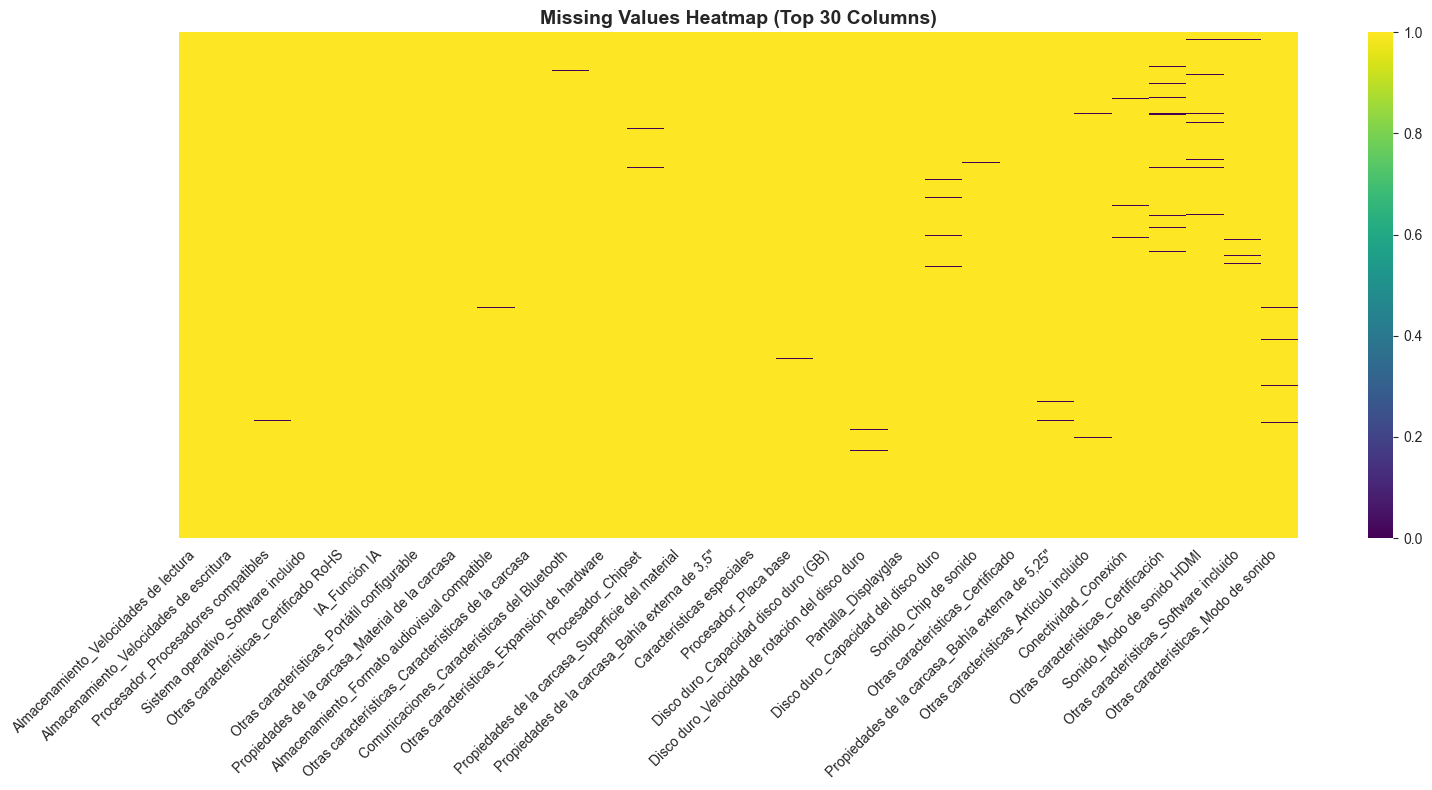

In [6]:
# Create missing values heatmap (sample of columns for visibility)
# Select columns with most missing values for visualization
top_missing_cols = missing_df[missing_df['Missing Count'] > 0].head(30).index.tolist()

if len(top_missing_cols) > 0:
    plt.figure(figsize=(16, 8))
    missing_data = df_computers[top_missing_cols].isnull()
    sns.heatmap(missing_data, yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Missing Values Heatmap (Top 30 Columns)', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(DOCS_DIR / 'missing_values_heatmap.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("No missing values to visualize")


## 4. EDA - Numeric Fields Analysis


In [7]:
# Identify numeric fields stored as strings
print("=" * 80)
print("4.1 Numeric Fields Stored as Strings")
print("=" * 80)

numeric_candidates = [
    'Pantalla_Tamaño de la pantalla',
    'Pantalla_Diagonal de la pantalla',
    'RAM_Memoria RAM',
    'Disco duro_Capacidad de memoria SSD',
    'Disco duro_Capacidad del disco duro',
    'Procesador_Frecuencia de reloj',
    'Medidas y peso_Peso',
    'Alimentación_Vatios-hora',
]

print("\nSample values from numeric candidate columns:")
for col in numeric_candidates:
    if col in df_computers.columns:
        sample = df_computers[col].dropna().head(3)
        if len(sample) > 0:
            print(f"\n{col}:")
            for val in sample:
                print(f"  - {val}")


4.1 Numeric Fields Stored as Strings

Sample values from numeric candidate columns:

Pantalla_Tamaño de la pantalla:
  - 13,6 pulgadas
  - 15,3 pulgadas
  - 14,2 pulgadas

Pantalla_Diagonal de la pantalla:
  - 34,544 cm
  - 38,862 cm
  - 36,068 cm

RAM_Memoria RAM:
  - 16 GB RAM
  - 16 GB RAM
  - 16 GB RAM

Disco duro_Capacidad de memoria SSD:
  - 512 GB
  - 1.000 GB
  - 512 GB

Disco duro_Capacidad del disco duro:
  - 256 GB
  - 256 GB
  - 1.000 GB

Procesador_Frecuencia de reloj:
  - 1,8 GHz
  - 3,8 GHz
  - 3,8 GHz

Medidas y peso_Peso:
  - 1,24 kg
  - 1,51 kg
  - 1,6 kg

Alimentación_Vatios-hora:
  - 52,6 Wh
  - 66,5 Wh
  - 70 Wh


## 5. EDA - Categorical Fields Analysis


In [8]:
# Value counts for key categorical fields
print("=" * 80)
print("5.1 Value Counts for Key Categorical Fields")
print("=" * 80)

categorical_cols = [
    'Procesador_Procesador',
    'Gráfica_Tarjeta gráfica',
    'Sistema operativo_Sistema operativo',
    'Serie',
    'Tipo de producto',
]

for col in categorical_cols:
    if col in df_computers.columns:
        print(f"\n{col}:")
        print(f"  Unique values: {df_computers[col].nunique()}")
        print(f"  Top 10 values:")
        print(df_computers[col].value_counts().head(10))
        print("-" * 80)


5.1 Value Counts for Key Categorical Fields

Procesador_Procesador:
  Unique values: 512
  Top 10 values:
Procesador_Procesador
Intel Core Ultra 7 155H    192
Intel Core i5-1235U        165
Intel Core i5-1335U        141
Intel Core i7-1355U        134
Intel Core i5-10400        133
Intel Core i7-11700F       120
AMD Ryzen 5 4500           120
Intel Core i7-13700F       105
Intel Core i7-13700        105
Intel Core i5-12400F       104
Name: count, dtype: int64
--------------------------------------------------------------------------------

Gráfica_Tarjeta gráfica:
  Unique values: 201
  Top 10 values:
Gráfica_Tarjeta gráfica
Intel Iris Xe Graphics        916
Intel UHD Graphics            715
NVIDIA GeForce RTX 4060       487
AMD Radeon Graphics           391
Intel UHD Graphics 770        374
NVIDIA GeForce RTX 4070       358
Intel Arc Graphics            270
Intel UHD Graphics 730        202
NVIDIA GeForce RTX 4060 Ti    191
NVIDIA GeForce RTX 3060       183
Name: count, dtype: int64
-

## 6. Identify Data Quality Issues


In [9]:
# Identify multilabel fields
print("=" * 80)
print("6.1 Multilabel Fields")
print("=" * 80)
multilabel_cols = identify_multilabel_columns(df_computers)
print(f"Columns with multilabel data: {len(multilabel_cols)}")
print(f"\nFirst 10 multilabel columns:")
for col in multilabel_cols[:10]:
    sample = df_computers[col].dropna().head(2)
    if len(sample) > 0:
        print(f"\n{col}:")
        for val in sample:
            print(f"  - {val}")


6.1 Multilabel Fields
Columns with multilabel data: 49

First 10 multilabel columns:

Título:
  - Apple MacBook Air 13" 2024 M3
  - Apple MacBook Air 15" 2024 M3

Precio_Rango:
  - 1.026,53 € – 2.287,17 €
  - 1.270,42 € – 2.672,25 €

Pantalla_Tamaño de la pantalla:
  - 13,6 pulgadas
  - 15,3 pulgadas

Pantalla_Diagonal de la pantalla:
  - 34,544 cm
  - 38,862 cm

Pantalla_Tecnología de la pantalla:
  - Retina
  - Retina

Pantalla_Luminosidad:
  - 500 cd/m²
  - 500 cd/m²

Comunicaciones_Conectividad:
  - wifi, Bluetooth
  - wifi, Bluetooth

Cámara_Webcam:
  - integrada
  - integrada

Teclado_Teclas adicionales:
  - teclas de función, teclas de dirección
  - teclas de función, teclas de dirección

Alimentación_Autonomía de la batería:
  - 15 h
  - 15 h


In [10]:
# Storage format issues
print("=" * 80)
print("6.2 Storage Format Issues")
print("=" * 80)
storage_col = 'Disco duro_Capacidad de memoria SSD'
if storage_col in df_computers.columns:
    sample = df_computers[storage_col].dropna().head(10)
    print(f"\nSample values from {storage_col}:")
    for val in sample:
        print(f"  - {val}")


6.2 Storage Format Issues

Sample values from Disco duro_Capacidad de memoria SSD:
  - 512 GB
  - 1.000 GB
  - 512 GB
  - 1.000 GB
  - 1.000 GB
  - 1.000 GB
  - 1.000 GB
  - 512 GB
  - 256 GB
  - 512 GB


In [11]:
# Screen size issues
print("=" * 80)
print("6.3 Screen Size Issues")
print("=" * 80)
screen_col = 'Pantalla_Tamaño de la pantalla'
if screen_col in df_computers.columns:
    sample = df_computers[screen_col].dropna().head(10)
    print(f"\nSample values from {screen_col}:")
    for val in sample:
        print(f"  - {val}")


6.3 Screen Size Issues

Sample values from Pantalla_Tamaño de la pantalla:
  - 13,6 pulgadas
  - 15,3 pulgadas
  - 14,2 pulgadas
  - 15,6 pulgadas
  - 16 pulgadas
  - 14 pulgadas
  - 16 pulgadas
  - 14 pulgadas
  - 14 pulgadas
  - 13,6 pulgadas


In [12]:
# CPU/GPU naming issues
print("=" * 80)
print("6.4 CPU/GPU Naming Issues")
print("=" * 80)
cpu_col = 'Procesador_Procesador'
if cpu_col in df_computers.columns:
    sample = df_computers[cpu_col].dropna().head(10)
    print(f"\nSample CPU names:")
    for val in sample:
        print(f"  - {val}")


6.4 CPU/GPU Naming Issues

Sample CPU names:
  - Apple M3
  - Apple M3
  - Intel Core i7-13700H
  - Intel Core Ultra 7 155H
  - AMD Ryzen AI 9 HX 370
  - Intel Core Ultra 9 185H
  - AMD Ryzen 7 8840HS
  - Intel Core i7-13620H
  - AMD Ryzen 7 8840HS
  - Apple M3


## 7. Data Cleaning

Now we'll apply all cleaning transformations step by step.


In [13]:
# Start with a copy of the original dataframe
df_clean = df_computers.copy()
print("Starting cleaning process...")
print(f"Initial shape: {df_clean.shape}")


Starting cleaning process...
Initial shape: (8064, 136)


### 7.1 Clean Multilabel Fields


In [14]:
# Clean multilabel fields
print("=" * 80)
print("7.1 Cleaning Multilabel Fields")
print("=" * 80)

# Preserve some columns if needed (like 'Ofertas' which might be informative)
preserve_cols = ['Ofertas']  # Add any columns you want to preserve

for col in multilabel_cols:
    if col not in preserve_cols:
        before_sample = df_clean[col].dropna().iloc[0] if len(df_clean[col].dropna()) > 0 else None
        df_clean[col] = clean_multilabel_series(df_clean[col])
        after_sample = df_clean[col].dropna().iloc[0] if len(df_clean[col].dropna()) > 0 else None
        if before_sample != after_sample and before_sample is not None:
            print(f"\n{col}:")
            print(f"  Before: '{before_sample}'")
            print(f"  After:  '{after_sample}'")

print(f"\nCleaned {len(multilabel_cols)} multilabel columns")


7.1 Cleaning Multilabel Fields

Precio_Rango:
  Before: '1.026,53 € – 2.287,17 €'
  After:  '1.026'

Pantalla_Tamaño de la pantalla:
  Before: '13,6 pulgadas'
  After:  '13'

Pantalla_Diagonal de la pantalla:
  Before: '34,544 cm'
  After:  '34'

Pantalla_Luminosidad:
  Before: '500 cd/m²'
  After:  '500 cd'

Comunicaciones_Conectividad:
  Before: 'wifi, Bluetooth'
  After:  'wifi'

Teclado_Teclas adicionales:
  Before: 'teclas de función, teclas de dirección'
  After:  'teclas de función'

Alimentación_Vatios-hora:
  Before: '52,6 Wh'
  After:  '52'

Medidas y peso_Profundidad:
  Before: '21,5 cm'
  After:  '21'

Medidas y peso_Ancho:
  Before: '30,4 cm'
  After:  '30'

Medidas y peso_Peso:
  Before: '1,24 kg'
  After:  '1'

Otras características_Equipamiento:
  Before: 'micrófono integrado, USB-C, Touchpad multitáctil, altavoces estéreo, Touch ID, webcam, Force Touch Trackpad'
  After:  'micrófono integrado'

Procesador_Frecuencia de reloj:
  Before: '1,8 GHz'
  After:  '1'

Pantalla

### 7.2 Clean Storage Fields


In [15]:
# Clean storage fields
print("=" * 80)
print("7.2 Cleaning Storage Fields")
print("=" * 80)

config = get_default_config()
df_clean = clean_storage_fields(
    df_clean,
    ssd_col=config['storage']['ssd_col'],
    hdd_col=config['storage']['hdd_col'],
    storage_type_col=config['storage']['storage_type_col']
)

# Show examples
print("\nStorage cleaning examples:")
if 'storage_total_gb' in df_clean.columns:
    sample = df_clean[['Disco duro_Capacidad de memoria SSD', 'ssd_gb', 'storage_total_gb']].dropna().head(5)
    print(sample)


7.2 Cleaning Storage Fields

Storage cleaning examples:
     Disco duro_Capacidad de memoria SSD  ssd_gb  storage_total_gb
4034                              500 GB     2.0               2.0
4037                            1.000 GB     2.0               2.0
4044                            1.000 GB     2.0               2.0
4056                              256 GB     2.0               2.0
4061                            1.000 GB     2.0               2.0


### 7.3 Clean Screen Fields


In [16]:
# Clean screen fields
print("=" * 80)
print("7.3 Cleaning Screen Fields")
print("=" * 80)

df_clean = clean_screen_fields(
    df_clean,
    size_col=config['screen']['size_col'],
    resolution_col=config['screen']['resolution_col']
)

# Show examples
print("\nScreen cleaning examples:")
if 'screen_size_inches' in df_clean.columns:
    sample = df_clean[[config['screen']['size_col'], 'screen_size_inches']].dropna().head(5)
    print(sample)


7.3 Cleaning Screen Fields

Screen cleaning examples:
  Pantalla_Tamaño de la pantalla  screen_size_inches
0                             13                13.0
1                             15                15.0
2                             14                14.0
3                             15                15.0
4                    16 pulgadas                16.0


### 7.4 Clean CPU/GPU Fields


In [17]:
# Clean CPU/GPU fields
print("=" * 80)
print("7.4 Cleaning CPU/GPU Fields")
print("=" * 80)

df_clean = create_cleaned_cpu_gpu_columns(
    df_clean,
    cpu_col=config['cpu_gpu']['cpu_col'],
    gpu_col=config['cpu_gpu']['gpu_col']
)

# Show examples
if 'cpu_clean' in df_clean.columns:
    print("\nCPU cleaning examples:")
    sample = df_clean[[config['cpu_gpu']['cpu_col'], 'cpu_clean']].dropna().head(5)
    print(sample)


7.4 Cleaning CPU/GPU Fields

CPU cleaning examples:
     Procesador_Procesador                cpu_clean
0                 Apple M3                 apple m3
1                 Apple M3                 apple m3
4     Intel Core i7-13700H     intel core i7-13700h
5  Intel Core Ultra 7 155H  intel core ultra 7 155h
6    AMD Ryzen AI 9 HX 370    amd ryzen ai 9 hx 370


### 7.5 Extract Numeric Values from Other Fields


In [18]:
# Extract numeric from other fields
print("=" * 80)
print("7.5 Extracting Numeric Values")
print("=" * 80)

numeric_fields = [
    ('RAM_Memoria RAM', 'ram_gb'),
    ('Procesador_Frecuencia de reloj', 'cpu_freq_ghz'),
    ('Medidas y peso_Peso', 'weight_kg'),
    ('Alimentación_Vatios-hora', 'battery_wh'),
]

for col, new_col in numeric_fields:
    if col in df_clean.columns:
        df_clean[new_col] = extract_numeric_series(df_clean[col])
        print(f"Created {new_col} from {col}")

# Show examples
print("\nNumeric extraction examples:")
if 'ram_gb' in df_clean.columns:
    sample = df_clean[['RAM_Memoria RAM', 'ram_gb']].dropna().head(5)
    print(sample)


7.5 Extracting Numeric Values
Created ram_gb from RAM_Memoria RAM
Created cpu_freq_ghz from Procesador_Frecuencia de reloj
Created weight_kg from Medidas y peso_Peso
Created battery_wh from Alimentación_Vatios-hora

Numeric extraction examples:
   RAM_Memoria RAM  ram_gb
3        16 GB RAM    16.0
4        16 GB RAM    16.0
5        16 GB RAM    16.0
7        32 GB RAM    32.0
18       16 GB RAM    16.0


### 7.6 Missing Value Imputation


In [19]:
# Missing value imputation
print("=" * 80)
print("7.6 Missing Value Imputation")
print("=" * 80)

# Numeric columns: median imputation
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
imputed_numeric = 0
for col in numeric_cols:
    if df_clean[col].isna().any():
        median_val = df_clean[col].median()
        if pd.notna(median_val):
            missing_count = df_clean[col].isna().sum()
            df_clean[col].fillna(median_val, inplace=True)
            imputed_numeric += missing_count

print(f"Imputed {imputed_numeric} missing values in numeric columns using median")

# Categorical columns: mode imputation or "Unknown"
categorical_cols = df_clean.select_dtypes(include=['object']).columns
imputed_categorical = 0
for col in categorical_cols:
    if df_clean[col].isna().any():
        mode_val = df_clean[col].mode()
        if len(mode_val) > 0:
            missing_count = df_clean[col].isna().sum()
            df_clean[col].fillna(mode_val[0], inplace=True)
            imputed_categorical += missing_count
        else:
            missing_count = df_clean[col].isna().sum()
            df_clean[col].fillna('Unknown', inplace=True)
            imputed_categorical += missing_count

print(f"Imputed {imputed_categorical} missing values in categorical columns using mode/Unknown")

# Verify no missing values remain
remaining_missing = df_clean.isnull().sum().sum()
print(f"\nRemaining missing values: {remaining_missing}")


7.6 Missing Value Imputation
Imputed 99159 missing values in numeric columns using median
Imputed 713634 missing values in categorical columns using mode/Unknown

Remaining missing values: 0


## 8. Visualizations


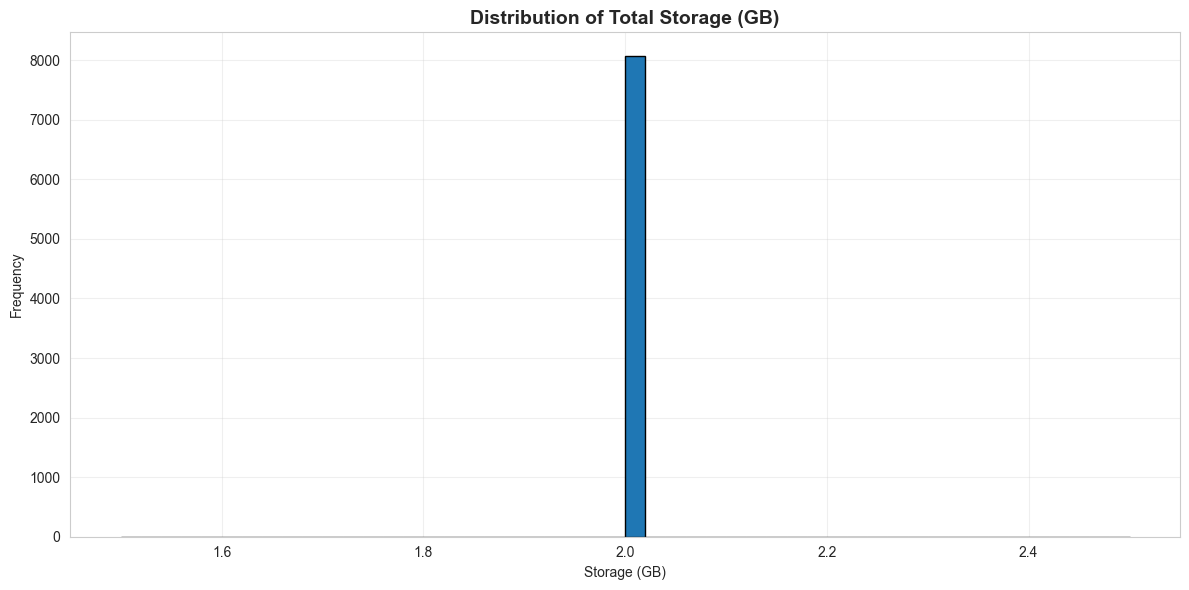

In [20]:
# Distribution plots for key numeric fields
if 'storage_total_gb' in df_clean.columns:
    plt.figure(figsize=(12, 6))
    df_clean['storage_total_gb'].hist(bins=50, edgecolor='black')
    plt.title('Distribution of Total Storage (GB)', fontsize=14, fontweight='bold')
    plt.xlabel('Storage (GB)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(DOCS_DIR / 'storage_distribution.png', dpi=150, bbox_inches='tight')
    plt.show()


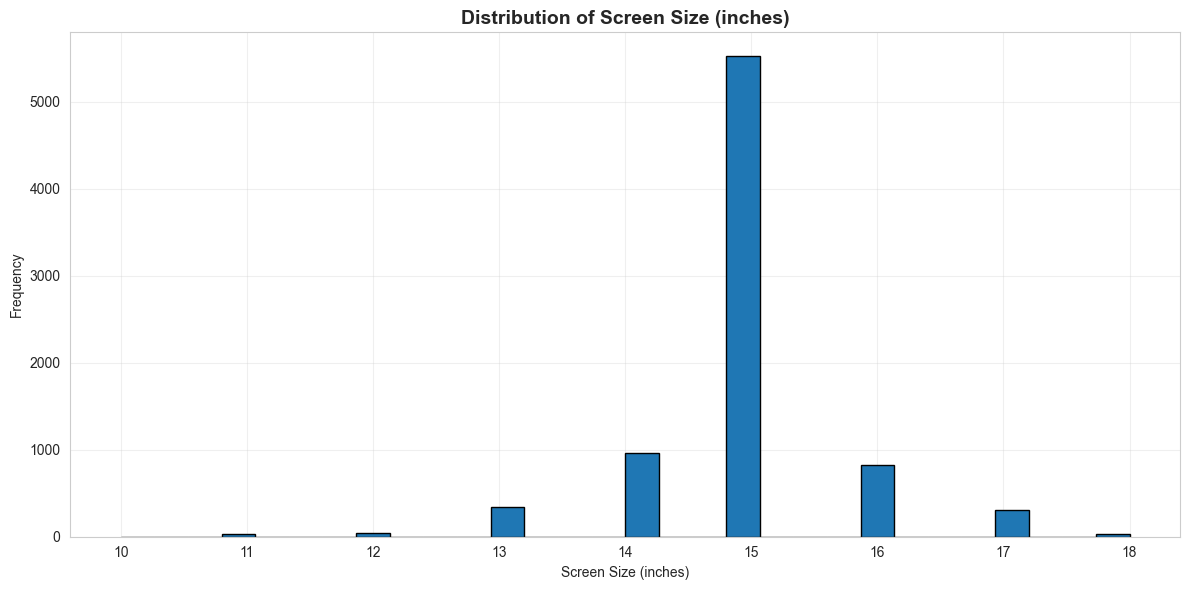

In [21]:
if 'screen_size_inches' in df_clean.columns:
    plt.figure(figsize=(12, 6))
    df_clean['screen_size_inches'].hist(bins=30, edgecolor='black')
    plt.title('Distribution of Screen Size (inches)', fontsize=14, fontweight='bold')
    plt.xlabel('Screen Size (inches)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(DOCS_DIR / 'screen_size_distribution.png', dpi=150, bbox_inches='tight')
    plt.show()


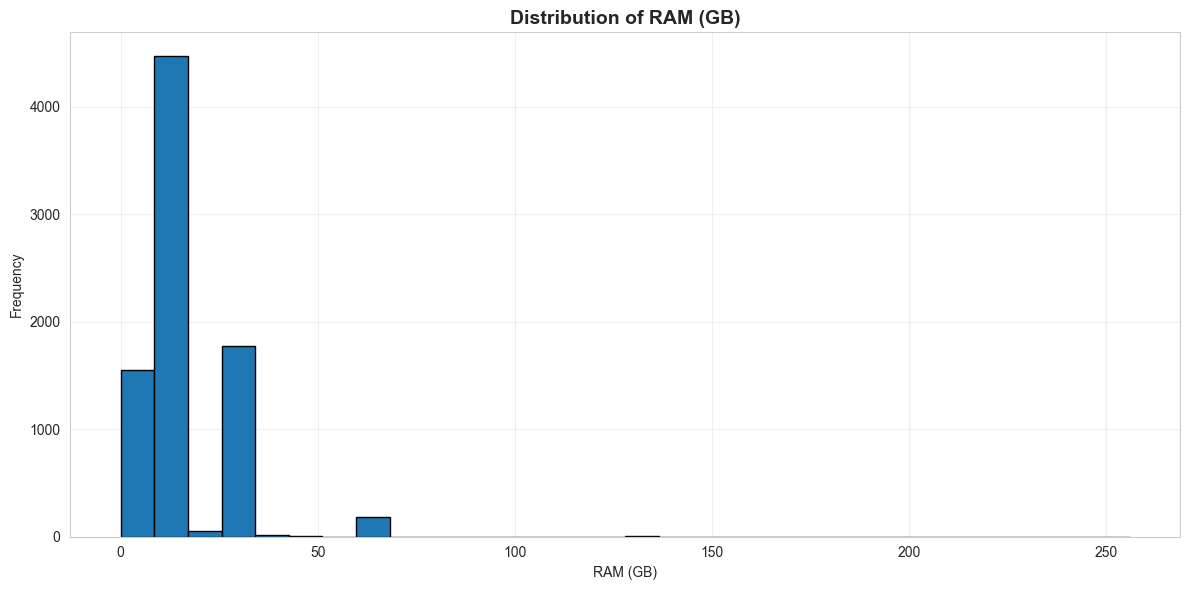

In [22]:
if 'ram_gb' in df_clean.columns:
    plt.figure(figsize=(12, 6))
    df_clean['ram_gb'].hist(bins=30, edgecolor='black')
    plt.title('Distribution of RAM (GB)', fontsize=14, fontweight='bold')
    plt.xlabel('RAM (GB)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(DOCS_DIR / 'ram_distribution.png', dpi=150, bbox_inches='tight')
    plt.show()


In [23]:
# Create output directory
os.makedirs(DATA_DIR / 'clean', exist_ok=True)

# Export cleaned dataset
output_path = DATA_DIR / 'clean/db_computers_cleaned.csv'
df_clean.to_csv(output_path, index=False)

print("=" * 80)
print("CLEANED DATASET EXPORTED")
print("=" * 80)
print(f"\nOutput path: {output_path}")
print(f"Final shape: {df_clean.shape}")
print(f"Original shape: {df_computers.shape}")
print(f"\nNew columns created:")
new_cols = [col for col in df_clean.columns if col not in df_computers.columns]
for col in new_cols:
    print(f"  - {col}")


CLEANED DATASET EXPORTED

Output path: /Users/estebansanchez/Desktop/DAI Project Final/docs/data/clean/db_computers_cleaned.csv
Final shape: (8064, 148)
Original shape: (8064, 136)

New columns created:
  - storage_total_gb
  - ssd_gb
  - hdd_gb
  - screen_size_inches
  - resolution_x
  - resolution_y
  - cpu_clean
  - gpu_clean
  - ram_gb
  - cpu_freq_ghz
  - weight_kg
  - battery_wh


## 10. Summary Statistics

Final summary of the cleaned dataset.


In [24]:
# Summary statistics for key numeric fields
print("=" * 80)
print("SUMMARY STATISTICS - CLEANED DATASET")
print("=" * 80)

summary_cols = ['storage_total_gb', 'ssd_gb', 'hdd_gb', 'screen_size_inches', 
                'ram_gb', 'cpu_freq_ghz', 'weight_kg', 'battery_wh']
available_cols = [col for col in summary_cols if col in df_clean.columns]

if available_cols:
    print("\nNumeric Summary:")
    print(df_clean[available_cols].describe())


SUMMARY STATISTICS - CLEANED DATASET

Numeric Summary:
       storage_total_gb  ssd_gb  screen_size_inches       ram_gb  \
count            8064.0  8064.0         8064.000000  8064.000000   
mean                2.0     2.0           14.952257    19.282738   
std                 0.0     0.0            0.832985    11.754799   
min                 2.0     2.0           10.000000     0.000000   
25%                 2.0     2.0           15.000000    16.000000   
50%                 2.0     2.0           15.000000    16.000000   
75%                 2.0     2.0           15.000000    24.000000   
max                 2.0     2.0           18.000000   256.000000   

       cpu_freq_ghz    weight_kg   battery_wh  
count   8064.000000  8064.000000  8064.000000  
mean       3.213202     1.601811    58.011533  
std       29.819758     1.985074    12.397364  
min        0.000000     0.000000    27.000000  
25%        2.000000     1.000000    56.000000  
50%        2.100000     1.000000    56.00000

In [25]:
# Data quality summary
print("\n" + "=" * 80)
print("DATA QUALITY SUMMARY")
print("=" * 80)
print(f"\nOriginal dataset:")
print(f"  Rows: {df_computers.shape[0]}")
print(f"  Columns: {df_computers.shape[1]}")
print(f"  Missing values: {df_computers.isnull().sum().sum()}")

print(f"\nCleaned dataset:")
print(f"  Rows: {df_clean.shape[0]}")
print(f"  Columns: {df_clean.shape[1]}")
print(f"  Missing values: {df_clean.isnull().sum().sum()}")

print(f"\nCleaning operations completed:")
print(f"  ✓ Multilabel fields cleaned: {len(multilabel_cols)}")
print(f"  ✓ Storage fields standardized")
print(f"  ✓ Screen fields normalized")
print(f"  ✓ CPU/GPU fields cleaned for matching")
print(f"  ✓ Numeric values extracted")
print(f"  ✓ Missing values imputed")



DATA QUALITY SUMMARY

Original dataset:
  Rows: 8064
  Columns: 136
  Missing values: 764042

Cleaned dataset:
  Rows: 8064
  Columns: 148
  Missing values: 0

Cleaning operations completed:
  ✓ Multilabel fields cleaned: 49
  ✓ Storage fields standardized
  ✓ Screen fields normalized
  ✓ CPU/GPU fields cleaned for matching
  ✓ Numeric values extracted
  ✓ Missing values imputed


# Section 2: Feature Engineering + CPU/GPU Mapping

## 2.1 CPU Name Parsing & Normalization

In this subsection we standardize the CPU information for each computer in the catalog so it can be used reliably for modeling and for linking to the external CPU benchmark table. We start from the free‑text column that describes the processor (e.g. `Procesador_Procesador`) and build a parsing pipeline that (1) normalizes the raw strings (lowercasing, removing accents, boilerplate words and punctuation), (2) detects the CPU brand (Intel, AMD, Apple, etc.), (3) extracts the product family (e.g., Core i5, Ryzen 7), numeric model code (e.g., 12400F, 5600H), and any suffixes (K, F, H, U, etc.), and (4) combines these elements into a canonical “CPU normalized key”. This gives us structured columns like `cpu_brand`, `cpu_family`, `cpu_model_code`, and `cpu_normalized_key` directly in `df_comp`, plus a `cpu_parse_status` flag that tells us whether each row was parsed cleanly or might need manual review.

In [26]:
cpu_col = "Procesador_Procesador"
if cpu_col not in df_computers.columns:
    raise KeyError(f"Expected column '{cpu_col}' not found in df_comp")

cpu_series = df_computers[cpu_col]

cpu_text_profile = pd.Series({
    "total_rows": len(cpu_series),
    "null_rows": int(cpu_series.isna().sum()),
    "null_pct": cpu_series.isna().mean().round(4),
    "unique_values": cpu_series.nunique(dropna=True)
})

print("CPU text column profile:")
display(cpu_text_profile.to_frame("value"))

print("\nSample CPU entries:")
display(cpu_series.dropna().sample(10, random_state=42).to_frame(name=cpu_col))


CPU text column profile:


,value
total_rows,8064.000
null_rows,1113.000
null_pct,0.138
unique_values,512.000



Sample CPU entries:


,Procesador_Procesador
7080,Intel Core i5-12400
5280,Inter Core i7-12700
5524,Intel Core i7-13700F
4821,Intel Core i5-13400F
7028,AMD Ryzen 3 3200G
2108,AMD Ryzen 7 7735HS
7950,Intel Core i5-10400
4294,AMD Ryzen 5 7500F
8058,AMD Ryzen 5 5600X
3115,Apple M4


In [27]:
import re

In [28]:
import unicodedata
from typing import Dict, Optional

CPU_NOISE_PATTERNS = [
    r"procesador",
    r"processor",
    r"with.*graphics",
    r"grafica integrada",
    r"quad-?core",
    r"hexa-?core",
    r"octa-?core",
    r"dodeca-?core",
    r"\bup to\b",
    r"\bmax\.?\b",
]

CPU_BRAND_PATTERNS = {
    "intel": r"\bintel\b|core i[3579]|celeron|pentium|xeon|atom",
    "amd": r"\bamd\b|ryzen|athlon|threadripper|epyc",
    "apple": r"\bapple\b|m1|m2|m3|m4",
    "qualcomm": r"\bqualcomm\b|snapdragon",
}

INTEL_FAMILY_PATTERNS = [
    (re.compile(r"core\s*i\s*([3579])"), lambda m: f"core i{m.group(1)}"),
    (re.compile(r"core\s*(duo|solo|m)"), lambda m: f"core {m.group(1)}"),
    (re.compile(r"xeon"), lambda _: "xeon"),
    (re.compile(r"celeron"), lambda _: "celeron"),
    (re.compile(r"pentium"), lambda _: "pentium"),
    (re.compile(r"atom"), lambda _: "atom"),
]

AMD_FAMILY_PATTERNS = [
    (re.compile(r"ryzen\s*(\d)"), lambda m: f"ryzen {m.group(1)}"),
    (re.compile(r"threadripper"), lambda _: "ryzen threadripper"),
    (re.compile(r"athlon"), lambda _: "athlon"),
    (re.compile(r"epyc"), lambda _: "epyc"),
]

APPLE_FAMILY_PATTERNS = [
    (re.compile(r"m(\d)\s*(pro|max|ultra)?"), lambda m: f"m{m.group(1)} {m.group(2)}".strip()),
]

QUALCOMM_FAMILY_PATTERNS = [
    (re.compile(r"snapdragon\s*(\d{3,4})"), lambda m: f"snapdragon {m.group(1)}"),
]

MODEL_PATTERN = re.compile(r"\b(\d{3,5})([a-z]{0,2})\b")
SUFFIX_CANDIDATES = {"k", "kf", "ks", "f", "g", "t", "p", "u", "h", "hx", "hk", "hs", "he", "x"}

def strip_accents(text: str) -> str:
    return unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("ascii")


def normalize_cpu_text(raw: Optional[str]) -> str:
    if not isinstance(raw, str):
        return ""
    text = strip_accents(raw)
    text = text.lower()
    text = text.replace("®", " ").replace("™", " ")
    text = re.sub(r"\(.*?\)", " ", text)
    text = re.sub(r"[\-/]", " ", text)
    for pattern in CPU_NOISE_PATTERNS:
        text = re.sub(pattern, " ", text)
    text = re.sub(r"[^a-z0-9 ]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text


def detect_brand(norm_text: str) -> Optional[str]:
    for brand, pattern in CPU_BRAND_PATTERNS.items():
        if re.search(pattern, norm_text):
            return brand
    return None


def detect_family(norm_text: str, brand: Optional[str]) -> Optional[str]:
    family_patterns = []
    if brand == "intel":
        family_patterns = INTEL_FAMILY_PATTERNS
    elif brand == "amd":
        family_patterns = AMD_FAMILY_PATTERNS
    elif brand == "apple":
        family_patterns = APPLE_FAMILY_PATTERNS
    elif brand == "qualcomm":
        family_patterns = QUALCOMM_FAMILY_PATTERNS
    else:
        family_patterns = INTEL_FAMILY_PATTERNS + AMD_FAMILY_PATTERNS + APPLE_FAMILY_PATTERNS + QUALCOMM_FAMILY_PATTERNS

    for pattern, formatter in family_patterns:
        match = pattern.search(norm_text)
        if match:
            return formatter(match)
    return None


def detect_model_and_suffix(norm_text: str) -> Dict[str, Optional[str]]:
    model_code = None
    suffix = None
    for match in MODEL_PATTERN.finditer(norm_text):
        candidate = match.group(1)
        letters = match.group(2)
        # Heuristic: prefer 4-5 digit hits (desktop/mobile CPUs)
        if len(candidate) >= 4:
            model_code = candidate + letters
            break
        if not model_code:
            model_code = candidate + letters

    if model_code:
        suffix_match = re.search(rf"{model_code}([a-z]{{1,2}})$", norm_text)
        if suffix_match:
            possible = suffix_match.group(1)
            if possible in SUFFIX_CANDIDATES:
                suffix = possible
        else:
            trailing_letters = re.findall(r"\b([a-z]{1,2})\b", norm_text)
            for candidate in trailing_letters[::-1]:
                if candidate in SUFFIX_CANDIDATES:
                    suffix = candidate
                    break

    return {"model_code": model_code, "suffix": suffix}


def build_cpu_key(brand: Optional[str], family: Optional[str], model_code: Optional[str], suffix: Optional[str]) -> Optional[str]:
    parts = [brand, family, model_code]
    key = " ".join([p for p in parts if p]).strip()
    if suffix and suffix not in key.split():
        key = f"{key} {suffix}".strip()
    return key or None


def parse_cpu_name(raw: Optional[str]) -> Dict[str, Optional[str]]:
    norm_text = normalize_cpu_text(raw)
    if not norm_text:
        return {
            "cpu_name_clean": None,
            "cpu_brand": None,
            "cpu_family": None,
            "cpu_model_code": None,
            "cpu_suffix": None,
            "cpu_normalized_key": None,
            "cpu_parse_status": "empty",
        }

    brand = detect_brand(norm_text)
    family = detect_family(norm_text, brand)
    model_info = detect_model_and_suffix(norm_text)
    model_code = model_info["model_code"]
    suffix = model_info["suffix"]
    normalized_key = build_cpu_key(brand, family, model_code, suffix)

    return {
        "cpu_name_clean": norm_text,
        "cpu_brand": brand,
        "cpu_family": family,
        "cpu_model_code": model_code,
        "cpu_suffix": suffix,
        "cpu_normalized_key": normalized_key or norm_text,
        "cpu_parse_status": "ok" if normalized_key else "needs_review",
    }



In [29]:
cpu_parsed_df = cpu_series.apply(parse_cpu_name).apply(pd.Series)
df_comp = pd.concat([df_computers, cpu_parsed_df], axis=1)

print("CPU parsing status counts:")
display(cpu_parsed_df["cpu_parse_status"].value_counts(dropna=False).to_frame("rows"))

print("\nParsed CPU samples:")
display(cpu_parsed_df.sample(10, random_state=7))


CPU parsing status counts:


,rows
cpu_parse_status,
ok,6945
empty,1113
needs_review,6



Parsed CPU samples:


,cpu_name_clean,cpu_brand,cpu_family,cpu_model_code,cpu_suffix,cpu_normalized_key,cpu_parse_status
6498,intel core i5 10400,intel,core i5,10400,None,intel core i5 10400,ok
7403,intel core i7 13700f,intel,core i7,13700f,None,intel core i7 13700f,ok
3601,intel core i9 13950hx,intel,core i9,13950hx,None,intel core i9 13950hx,ok
3673,intel core i7 1355u,intel,core i7,1355u,None,intel core i7 1355u,ok
3449,intel core i7 12800hx,intel,core i7,12800hx,None,intel core i7 12800hx,ok
6071,intel core i7 1355u,intel,core i7,1355u,None,intel core i7 1355u,ok
5978,amd ryzen 7 5700g,amd,ryzen 7,5700g,None,amd ryzen 7 5700g,ok
6927,intel core i5 13420h,intel,core i5,13420h,None,intel core i5 13420h,ok
1741,intel n100,intel,None,None,None,intel,ok
6407,amd ryzen 7 5700x3d,amd,ryzen 7,None,None,amd ryzen 7,ok


The table of `cpu_parse_status` counts above shows that the vast majority of rows fall into the `"ok"` category, meaning our regex‑based parser was able to extract a brand, family, and model code that form a stable normalized key. A smaller number of rows are labeled `"needs_review"`, which typically correspond to edge cases such as very old processors, unusual naming conventions, or incomplete descriptions; these are still normalized into a clean text string, but the parser was not confident enough to assign a full structured key. The `"empty"` cases are rows where the original CPU field was missing or blank. The sample of parsed CPUs confirms that the cleaned fields make sense: Intel and AMD rows show the expected pattern of `cpu_brand` (e.g., “intel”), `cpu_family` (e.g., “core i7”, “ryzen 5”), and `cpu_model_code` (e.g., “10700”, “5600h”), and the constructed `cpu_normalized_key` is a compact, machine‑friendly representation that aligns closely with how CPUs are listed in the benchmark dataset.

## 2.2 CPU Benchmark Mapping


Once we have normalized CPU names in the computers dataset, we link them to the external CPU benchmark table to bring in objective performance metrics. First, we apply the same parsing and normalization logic to the `CPU Name` field in the benchmark dataset (`df_cpu`) so both tables share a comparable `cpu_normalized_key`. We then build a CPU lookup table that keeps, for each normalized key, the best available benchmark record (highest `CPU Mark`) along with its rank, value score, and price. Using this lookup, we perform an exact join on `cpu_normalized_key`, and then apply a second pass of fuzzy matching (based on string similarity) for computers that were not matched exactly, recording both the chosen match and a similarity score.

In [30]:
cpu_bench_cols = {
    "CPU Name": "cpu_bench_name",
    "CPU Mark (higher is better)": "cpu_bench_mark",
    "Rank (lower is better)": "cpu_bench_rank",
    "CPU Value (higher is better)": "cpu_bench_value",
    "Price (USD)": "cpu_bench_price_usd",
}

missing_bench_cols = [col for col in cpu_bench_cols if col not in df_cpu.columns]
if missing_bench_cols:
    raise KeyError(f"Missing expected CPU benchmark columns: {missing_bench_cols}")

cpu_bench_parsed = df_cpu["CPU Name"].apply(parse_cpu_name).apply(pd.Series)
df_cpu = pd.concat([df_cpu, cpu_bench_parsed], axis=1)

df_cpu_lookup = (
    df_cpu.rename(columns=cpu_bench_cols)
    .sort_values("cpu_bench_mark", ascending=False)
    .drop_duplicates(subset=["cpu_normalized_key"], keep="first")
)

cpu_lookup_subset = df_cpu_lookup[[
    "cpu_normalized_key",
    "cpu_bench_name",
    "cpu_bench_mark",
    "cpu_bench_rank",
    "cpu_bench_value",
    "cpu_bench_price_usd",
]]

print("CPU benchmark lookup preview:")
display(cpu_lookup_subset.head())


CPU benchmark lookup preview:


,cpu_normalized_key,cpu_bench_name,cpu_bench_mark,cpu_bench_rank,cpu_bench_value,cpu_bench_price_usd
588,amd epyc 9965,AMD EPYC 9965,160778,1,10.85,"$14,813.00*"
582,amd epyc 9655p,AMD EPYC 9655P,160417,2,14.84,"$10,811.00*"
589,amd epyc,AMD EPYC 9B45,158790,3,11.71,"$13,564.00*"
581,amd epyc 9655,AMD EPYC 9655,156085,4,13.17,"$11,852.00*"
587,amd epyc 9845,AMD EPYC 9845,152985,5,11.28,"$13,564.00*"


The “CPU benchmark lookup preview” confirms that each row in the lookup table has a clean `cpu_normalized_key` alongside the original `CPU Name` and its associated metrics (`cpu_bench_mark`, `cpu_bench_rank`, `cpu_bench_value`, and `cpu_bench_price_usd`).

In [31]:
df_comp = df_comp.merge(cpu_lookup_subset, on="cpu_normalized_key", how="left", suffixes=("", "_bench"))

df_comp["cpu_match_strategy"] = np.where(df_comp["cpu_bench_name"].notna(), "exact", "unmatched")
df_comp["cpu_match_score"] = np.where(df_comp["cpu_bench_name"].notna(), 1.0, np.nan)

print("Exact CPU matches:", (df_comp["cpu_match_strategy"] == "exact").mean().round(4))


Exact CPU matches: 0.8585


 The “Exact CPU matches” proportion shows that a substantial share of computers could be mapped directly via exact keys, indicating that the normalization logic for both datasets is well aligned. 

In [32]:
from difflib import SequenceMatcher, get_close_matches

cpu_lookup_keys = [key for key in cpu_lookup_subset["cpu_normalized_key"].dropna().unique()]
unmatched_keys = [
    key for key in df_comp.loc[df_comp["cpu_match_strategy"] == "unmatched", "cpu_normalized_key"].dropna().unique()
]

fuzzy_matches = []
cutoff = 0.82
for key in unmatched_keys:
    matches = get_close_matches(key, cpu_lookup_keys, n=1, cutoff=cutoff)
    if matches:
        match_key = matches[0]
        score = SequenceMatcher(None, key, match_key).ratio()
        fuzzy_matches.append({
            "cpu_normalized_key": key,
            "cpu_bench_match_key": match_key,
            "cpu_match_score_fuzzy": round(score, 4),
        })

fuzzy_matches_df = pd.DataFrame(fuzzy_matches)

if not fuzzy_matches_df.empty:
    lookup_for_fuzzy = cpu_lookup_subset.rename(columns={"cpu_normalized_key": "cpu_bench_match_key"})
    fuzzy_matches_df = fuzzy_matches_df.merge(lookup_for_fuzzy, on="cpu_bench_match_key", how="left")
    bench_cols = [
        "cpu_bench_name",
        "cpu_bench_mark",
        "cpu_bench_rank",
        "cpu_bench_value",
        "cpu_bench_price_usd",
    ]
    fuzzy_matches_df = fuzzy_matches_df.rename(columns={col: f"{col}_fuzzy" for col in bench_cols})
    df_comp = df_comp.merge(fuzzy_matches_df, on="cpu_normalized_key", how="left")

    for col in bench_cols:
        df_comp[col] = df_comp[col].fillna(df_comp[f"{col}_fuzzy"])
        df_comp.drop(columns=[f"{col}_fuzzy"], inplace=True)

    df_comp["cpu_match_score"] = df_comp["cpu_match_score"].fillna(df_comp["cpu_match_score_fuzzy"])
    df_comp.drop(columns=["cpu_match_score_fuzzy"], inplace=True)

    mask_unmatched = df_comp["cpu_match_strategy"] == "unmatched"
    df_comp.loc[mask_unmatched, "cpu_match_strategy"] = np.where(
        df_comp.loc[mask_unmatched, "cpu_bench_name"].notna(),
        "fuzzy",
        "unmatched",
    )

    if "cpu_bench_match_key" in df_comp.columns:
        df_comp.drop(columns=["cpu_bench_match_key"], inplace=True)

print("CPU match strategy distribution:")
display(df_comp["cpu_match_strategy"].value_counts(dropna=False).to_frame("rows"))


CPU match strategy distribution:


,rows
cpu_match_strategy,
exact,6923
unmatched,1115
fuzzy,26


The “CPU match strategy distribution” table shows how many rows were matched exactly, how many benefited from fuzzy matching, and how many remain unmatched; the presence of a non‑trivial fuzzy bucket demonstrates that the similarity step successfully recovers CPUs with minor naming differences (extra words, spacing, or minor typos). 

In [33]:
cpu_match_coverage = {
    "rows_with_cpu_benchmark": int(df_comp["cpu_bench_mark"].notna().sum()),
    "rows_total": len(df_comp),
    "coverage_pct": df_comp["cpu_bench_mark"].notna().mean().round(4),
    "fuzzy_matches": int((df_comp["cpu_match_strategy"] == "fuzzy").sum()),
}

display(pd.Series(cpu_match_coverage).to_frame("value"))

display(df_comp[[
    cpu_col,
    "cpu_normalized_key",
    "cpu_bench_name",
    "cpu_bench_mark",
    "cpu_match_strategy",
    "cpu_match_score",
]].head(10))


,value
rows_with_cpu_benchmark,6949.0000
rows_total,8064.0000
coverage_pct,0.8617
fuzzy_matches,26.0000


,Procesador_Procesador,cpu_normalized_key,cpu_bench_name,cpu_bench_mark,cpu_match_strategy,cpu_match_score
0,Apple M3,apple m3 None,Apple M3 Max 16 Core,41228.0,exact,1.0
1,Apple M3,apple m3 None,Apple M3 Max 16 Core,41228.0,exact,1.0
2,NaN,None,NaN,NaN,unmatched,NaN
3,NaN,None,NaN,NaN,unmatched,NaN
4,Intel Core i7-13700H,intel core i7 13700h,Intel Core i7-13700H,26452.0,exact,1.0
5,Intel Core Ultra 7 155H,intel 155h,Intel Core Ultra 7 155H,24954.0,exact,1.0
6,AMD Ryzen AI 9 HX 370,amd 370 hx,AMD Ryzen AI 9 HX 370,35129.0,exact,1.0
7,Intel Core Ultra 9 185H,intel 185h,Intel Core Ultra 9 185H,29409.0,exact,1.0
8,AMD Ryzen 7 8840HS,amd ryzen 7 8840hs,AMD Ryzen 7 PRO 8840HS,27059.0,exact,1.0
9,NaN,None,NaN,NaN,unmatched,NaN


The coverage summary confirms that a large fraction of computers now have non‑missing `cpu_bench_mark` values, which is essential for downstream performance and value‑for‑money features.

## 2.3 GPU Name Parsing & Normalization

In this subsection we repeat the parsing logic, but now for GPUs, to unlock the external GPU benchmark table. We start from the main GPU description column in the computers dataset (e.g., `Gráfica_Tarjeta gráfica`) and design a parser that (1) normalizes the raw text (lowercasing, removing accents and generic words like “graphics card”), (2) detects the GPU brand (NVIDIA, AMD, Intel, Apple), (3) extracts the series (e.g., RTX, GTX, RX, Arc, Iris) and numeric model identifier (e.g., 3060, 6600), (4) identifies key suffixes (Ti, Super, XT, Max‑Q, etc.), and (5) combines these attributes into a `gpu_normalized_key`. As with CPUs, we store structured fields such as `gpu_brand`, `gpu_series`, `gpu_model_number`, and `gpu_suffix`, plus a `gpu_parse_status` flag to track the quality of the parse.

In [34]:
gpu_col = "Gráfica_Tarjeta gráfica"
if gpu_col not in df_comp.columns:
    raise KeyError(f"Expected column '{gpu_col}' not found in df_comp")

gpu_series = df_comp[gpu_col]

gpu_text_profile = pd.Series({
    "total_rows": len(gpu_series),
    "null_rows": int(gpu_series.isna().sum()),
    "null_pct": gpu_series.isna().mean().round(4),
    "unique_values": gpu_series.nunique(dropna=True)
})

print("GPU text column profile:")
display(gpu_text_profile.to_frame("value"))

print("\nSample GPU entries:")
display(gpu_series.dropna().sample(10, random_state=21).to_frame(name=gpu_col))


GPU text column profile:


,value
total_rows,8064.0000
null_rows,1352.0000
null_pct,0.1677
unique_values,201.0000



Sample GPU entries:


,Gráfica_Tarjeta gráfica
8053,NVIDIA GeForce RTX 4070
1783,NVIDIA GeForce RTX 4050
3932,AMD Radeon 610M
7909,AMD Radeon RX 7900 GRE
2605,AMD Radeon RX Vega 8
1521,Intel Iris Xe Graphics
7126,NVIDIA GeForce RTX 4090
2973,Intel UHD Graphics
3226,Apple M2 Graphics
2235,Intel Iris Xe Graphics


In [35]:
GPU_NOISE_PATTERNS = [
    r"tarjeta grafica",
    r"graphics card",
    r"graphic card",
    r"gddr\d",
    r"integrada",
    r" dedicada",
    r"video",
    r",",
]

GPU_BRAND_PATTERNS = {
    "nvidia": r"nvidia|geforce|rtx|gtx|mx|tesla|quadro",
    "amd": r"amd|radeon|rx|vega",
    "intel": r"intel|iris|uhd|arc",
    "apple": r"apple|m\d",
}

GPU_SERIES_PATTERNS = [
    (re.compile(r"rtx\s*(\d{3,4})"), lambda m: ("rtx", m.group(1))),
    (re.compile(r"gtx\s*(\d{3,4})"), lambda m: ("gtx", m.group(1))),
    (re.compile(r"mx\s*(\d{3,4})"), lambda m: ("mx", m.group(1))),
    (re.compile(r"rx\s*(\d{3,4})"), lambda m: ("rx", m.group(1))),
    (re.compile(r"arc\s*(a\d{3})"), lambda m: ("arc", m.group(1))),
    (re.compile(r"iris\s*(xe|pro)"), lambda m: ("iris", m.group(1))),
    (re.compile(r"uhd\s*(\d{3})"), lambda m: ("uhd", m.group(1))),
    (re.compile(r"vega\s*(\d{1,2})"), lambda m: ("vega", m.group(1))),
    (re.compile(r"radeon\s*(\w+)"), lambda m: ("radeon", m.group(1))),
]

GPU_SUFFIX_NORMALIZATION = {
    "ti": "ti",
    "super": "super",
    "max q": "max-q",
    "max-q": "max-q",
    "maxq": "max-q",
    "mobile": "mobile",
    "laptop": "mobile",
    "xt": "xt",
    "x": "x",
    "pro": "pro",
}

GPU_MODEL_PATTERN = re.compile(r"\b(\d{3,4})(ti|super|xt|x|m)?\b")


def normalize_gpu_text(raw: Optional[str]) -> str:
    if not isinstance(raw, str):
        return ""
    text = strip_accents(raw)
    text = text.lower()
    text = re.sub(r"\(.*?\)", " ", text)
    text = re.sub(r"[\-/]", " ", text)
    for pattern in GPU_NOISE_PATTERNS:
        text = re.sub(pattern, " ", text)
    text = re.sub(r"[^a-z0-9 ]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text


def detect_gpu_brand(norm_text: str) -> Optional[str]:
    for brand, pattern in GPU_BRAND_PATTERNS.items():
        if re.search(pattern, norm_text):
            return brand
    return None


def detect_gpu_series_and_model(norm_text: str) -> Dict[str, Optional[str]]:
    for pattern, formatter in GPU_SERIES_PATTERNS:
        match = pattern.search(norm_text)
        if match:
            series, model = formatter(match)
            # Clean any lingering words like 'geforce'
            series = series.strip()
            model = model.strip()
            return {"series": series, "model": model}

    model_match = GPU_MODEL_PATTERN.search(norm_text)
    if model_match:
        return {"series": None, "model": model_match.group(1)}

    return {"series": None, "model": None}


def detect_gpu_suffix(norm_text: str) -> Optional[str]:
    for raw_suffix, normalized in GPU_SUFFIX_NORMALIZATION.items():
        if re.search(rf"\b{re.escape(raw_suffix)}\b", norm_text):
            return normalized
    return None


def build_gpu_key(brand: Optional[str], series: Optional[str], model: Optional[str], suffix: Optional[str]) -> Optional[str]:
    parts = [brand, series, model]
    key = " ".join([p for p in parts if p]).strip()
    if suffix and suffix not in key.split():
        key = f"{key} {suffix}".strip()
    return key or None


def parse_gpu_name(raw: Optional[str]) -> Dict[str, Optional[str]]:
    norm_text = normalize_gpu_text(raw)
    if not norm_text:
        return {
            "gpu_name_clean": None,
            "gpu_brand": None,
            "gpu_series": None,
            "gpu_model_number": None,
            "gpu_suffix": None,
            "gpu_normalized_key": None,
            "gpu_parse_status": "empty",
        }

    brand = detect_gpu_brand(norm_text)
    series_model = detect_gpu_series_and_model(norm_text)
    suffix = detect_gpu_suffix(norm_text)
    normalized_key = build_gpu_key(brand, series_model["series"], series_model["model"], suffix)

    return {
        "gpu_name_clean": norm_text,
        "gpu_brand": brand,
        "gpu_series": series_model["series"],
        "gpu_model_number": series_model["model"],
        "gpu_suffix": suffix,
        "gpu_normalized_key": normalized_key or norm_text,
        "gpu_parse_status": "ok" if normalized_key else "needs_review",
    }



In [36]:
gpu_parsed_df = gpu_series.apply(parse_gpu_name).apply(pd.Series)
df_comp = pd.concat([df_comp, gpu_parsed_df], axis=1)

print("GPU parsing status counts:")
display(gpu_parsed_df["gpu_parse_status"].value_counts(dropna=False).to_frame("rows"))

print("\nParsed GPU samples:")
display(gpu_parsed_df.sample(10, random_state=11))


GPU parsing status counts:


,rows
gpu_parse_status,
ok,6669
empty,1352
needs_review,43



Parsed GPU samples:


,gpu_name_clean,gpu_brand,gpu_series,gpu_model_number,gpu_suffix,gpu_normalized_key,gpu_parse_status
4179,intel uhd graphics 770,intel,None,770,None,intel 770,ok
6168,nvidia geforce rtx 4080 super,nvidia,rtx,4080,super,nvidia rtx 4080 super,ok
109,amd radeon graphics,amd,radeon,graphics,None,amd radeon graphics,ok
8041,intel uhd graphics,intel,None,None,None,intel,ok
2524,intel iris xe graphics,intel,iris,xe,None,intel iris xe,ok
3843,intel iris xe graphics,intel,iris,xe,None,intel iris xe,ok
5685,None,None,None,None,None,None,empty
6056,None,None,None,None,None,None,empty
3515,intel uhd graphics,intel,None,None,None,intel,ok
3929,intel uhd graphics,intel,None,None,None,intel,ok


The GPU text profile and the `gpu_parse_status` counts show that the parser can successfully interpret most GPU descriptions, with many rows marked as `"ok"` and only a minority flagged as `"needs_review"` or `"empty"`. In the sample of parsed GPUs, we can see that NVIDIA cards correctly reflect their series and model (e.g., “rtx 3060 ti”, “gtx 1650”), while AMD entries expose “rx” or “radeon” series and numeric identifiers, and Intel integrated graphics map to `iris`, `uhd`, or `arc` families. The resulting `gpu_normalized_key` strings are compact and consistent, stripping away marketing noise while keeping the essential model information; this is exactly what we need for robust matching against the external PassMark GPU table, even when the original product descriptions are verbose or slightly inconsistent.

## 2.4 GPU Benchmark Mapping


With normalized GPU keys in hand, we now connect each computer’s GPU to the external PassMark GPU benchmarks. We start by parsing and normalizing the `Videocard Name` field in the GPU benchmark dataset (`df_gpu`) using the same GPU parser, so that both tables share a comparable `gpu_normalized_key`. From this, we construct a GPU lookup table that retains one high‑quality benchmark entry per normalized key, including `gpu_bench_mark` (PassMark G3D score), `gpu_bench_rank`, `gpu_bench_value`, and `gpu_bench_price_usd`. We then merge this lookup into `df_comp` via an exact join on `gpu_normalized_key`, and for rows that remain unmatched, we apply fuzzy matching to find the most similar known GPU key, recording the chosen match, the similarity score, and whether the mapping was exact or fuzzy.

In [37]:
gpu_bench_cols = {
    "Videocard Name": "gpu_bench_name",
    "Passmark G3D Mark (higher is better)": "gpu_bench_mark",
    "Rank (lower is better)": "gpu_bench_rank",
    "Videocard Value (higher is better)": "gpu_bench_value",
    "Price (USD)": "gpu_bench_price_usd",
}

missing_gpu_cols = [col for col in gpu_bench_cols if col not in df_gpu.columns]
if missing_gpu_cols:
    raise KeyError(f"Missing expected GPU benchmark columns: {missing_gpu_cols}")

gpu_bench_parsed = df_gpu["Videocard Name"].apply(parse_gpu_name).apply(pd.Series)
df_gpu = pd.concat([df_gpu, gpu_bench_parsed], axis=1)

df_gpu_lookup = (
    df_gpu.rename(columns=gpu_bench_cols)
    .sort_values("gpu_bench_mark", ascending=False)
    .drop_duplicates(subset=["gpu_normalized_key"], keep="first")
)

gpu_lookup_subset = df_gpu_lookup[[
    "gpu_normalized_key",
    "gpu_bench_name",
    "gpu_bench_mark",
    "gpu_bench_rank",
    "gpu_bench_value",
    "gpu_bench_price_usd",
]]

print("GPU benchmark lookup preview:")
display(gpu_lookup_subset.head())


GPU benchmark lookup preview:


,gpu_normalized_key,gpu_bench_name,gpu_bench_mark,gpu_bench_rank,gpu_bench_value,gpu_bench_price_usd
664,nvidia rtx 5090,GeForce RTX 5090 D,39850,1,NaN,NaN
651,nvidia rtx 4090,GeForce RTX 4090,38264,3,17.76,"$2,153.94*"
661,nvidia rtx 5080,GeForce RTX 5080,36144,4,26.23,"$1,377.98"
648,nvidia rtx 4080,GeForce RTX 4080,34435,5,22.99,"$1,498.07*"
650,nvidia rtx 4080 super,GeForce RTX 4080 SUPER,34244,6,31.13,"$1,099.99*"


The “GPU benchmark lookup preview” confirms that the GPU benchmark dataset has been successfully transformed into a normalized lookup keyed by `gpu_normalized_key`, with the expected PassMark metrics attached to each entry. 

In [38]:
df_comp = df_comp.merge(gpu_lookup_subset, on="gpu_normalized_key", how="left", suffixes=("", "_gpu"))

df_comp["gpu_match_strategy"] = np.where(df_comp["gpu_bench_name"].notna(), "exact", "unmatched")
df_comp["gpu_match_score"] = np.where(df_comp["gpu_bench_name"].notna(), 1.0, np.nan)

print("Exact GPU matches:", (df_comp["gpu_match_strategy"] == "exact").mean().round(4))


Exact GPU matches: 0.8084


The “Exact GPU matches” fraction indicates how many computers could be linked directly to a GPU benchmark row through an exact key match, which is a good sign that our normalization logic is compatible with how GPUs are named in the benchmark file. 

In [39]:
gpu_lookup_keys = [key for key in gpu_lookup_subset["gpu_normalized_key"].dropna().unique()]
unmatched_gpu_keys = [
    key for key in df_comp.loc[df_comp["gpu_match_strategy"] == "unmatched", "gpu_normalized_key"].dropna().unique()
]

gpu_fuzzy_matches = []
gpu_cutoff = 0.80
for key in unmatched_gpu_keys:
    matches = get_close_matches(key, gpu_lookup_keys, n=1, cutoff=gpu_cutoff)
    if matches:
        match_key = matches[0]
        score = SequenceMatcher(None, key, match_key).ratio()
        gpu_fuzzy_matches.append({
            "gpu_normalized_key": key,
            "gpu_bench_match_key": match_key,
            "gpu_match_score_fuzzy": round(score, 4),
        })

gpu_fuzzy_df = pd.DataFrame(gpu_fuzzy_matches)

if not gpu_fuzzy_df.empty:
    lookup_for_gpu = gpu_lookup_subset.rename(columns={"gpu_normalized_key": "gpu_bench_match_key"})
    gpu_fuzzy_df = gpu_fuzzy_df.merge(lookup_for_gpu, on="gpu_bench_match_key", how="left")
    gpu_bench_cols = [
        "gpu_bench_name",
        "gpu_bench_mark",
        "gpu_bench_rank",
        "gpu_bench_value",
        "gpu_bench_price_usd",
    ]
    gpu_fuzzy_df = gpu_fuzzy_df.rename(columns={col: f"{col}_fuzzy" for col in gpu_bench_cols})
    df_comp = df_comp.merge(gpu_fuzzy_df, on="gpu_normalized_key", how="left")

    for col in gpu_bench_cols:
        df_comp[col] = df_comp[col].fillna(df_comp[f"{col}_fuzzy"])
        df_comp.drop(columns=[f"{col}_fuzzy"], inplace=True)

    df_comp["gpu_match_score"] = df_comp["gpu_match_score"].fillna(df_comp["gpu_match_score_fuzzy"])
    df_comp.drop(columns=["gpu_match_score_fuzzy"], inplace=True)

    mask_unmatched = df_comp["gpu_match_strategy"] == "unmatched"
    df_comp.loc[mask_unmatched, "gpu_match_strategy"] = np.where(
        df_comp.loc[mask_unmatched, "gpu_bench_name"].notna(),
        "fuzzy",
        "unmatched",
    )

    if "gpu_bench_match_key" in df_comp.columns:
        df_comp.drop(columns=["gpu_bench_match_key"], inplace=True)

print("GPU match strategy distribution:")
display(df_comp["gpu_match_strategy"].value_counts(dropna=False).to_frame("rows"))


GPU match strategy distribution:


,rows
gpu_match_strategy,
exact,6519
unmatched,1395
fuzzy,150


The GPU match strategy distribution shows the balance between `"exact"`, `"fuzzy"`, and `"unmatched"` rows; fuzzy matches fill in many of the gaps by tolerating slight text discrepancies, while any remaining “unmatched” cases are typically unusual or very generic descriptions (e.g., only “integrated graphics”).

In [40]:
gpu_match_coverage = {
    "rows_with_gpu_benchmark": int(df_comp["gpu_bench_mark"].notna().sum()),
    "rows_total": len(df_comp),
    "coverage_pct": df_comp["gpu_bench_mark"].notna().mean().round(4),
    "fuzzy_matches": int((df_comp["gpu_match_strategy"] == "fuzzy").sum()),
}

display(pd.Series(gpu_match_coverage).to_frame("value"))

display(df_comp[[
    gpu_col,
    "gpu_normalized_key",
    "gpu_bench_name",
    "gpu_bench_mark",
    "gpu_match_strategy",
    "gpu_match_score",
]].head(10))


,value
rows_with_gpu_benchmark,6669.000
rows_total,8064.000
coverage_pct,0.827
fuzzy_matches,150.000


,Gráfica_Tarjeta gráfica,gpu_normalized_key,gpu_bench_name,gpu_bench_mark,gpu_match_strategy,gpu_match_score
0,NaN,None,NaN,NaN,unmatched,NaN
1,NaN,None,NaN,NaN,unmatched,NaN
2,NaN,None,NaN,NaN,unmatched,NaN
3,NaN,None,NaN,NaN,unmatched,NaN
4,NaN,None,NaN,NaN,unmatched,NaN
5,Intel Arc Graphics,intel,Intel Arc B580,15761.0,exact,1.0
6,NaN,None,NaN,NaN,unmatched,NaN
7,Intel Arc Graphics,intel,Intel Arc B580,15761.0,exact,1.0
8,NaN,None,NaN,NaN,unmatched,NaN
9,NaN,None,NaN,NaN,unmatched,NaN


 The GPU coverage summary demonstrates that a large portion of the catalog now has a valid `gpu_bench_mark`, giving us a strong performance signal on the graphics side to complement the CPU benchmarks.

## 2.5 Engineered Features


Having attached CPU and GPU benchmarks, we proceed to engineer higher‑level features that better capture a computer’s capabilities and value for money. First, we parse and aggregate storage fields into numeric capacities in gigabytes, distinguishing SSD and HDD where possible and computing `total_ssd_gb`, `total_hdd_gb`, and `total_storage_gb`, as well as a binary `has_ssd` indicator. 

In [41]:
def _safe_float(value: Optional[str]) -> Optional[float]:
    if pd.isna(value):
        return None
    if isinstance(value, (int, float)):
        return float(value)
    text = strip_accents(str(value)).strip().lower()
    if not text:
        return None
    text = re.sub(r"[^0-9,.-]", "", text)
    if text.count(",") == 1 and text.count(".") == 0:
        text = text.replace(",", ".")
    elif text.count(",") > 1 and "." in text:
        text = text.replace(".", "").replace(",", ".")
    else:
        text = text.replace(",", "")
    try:
        return float(text)
    except ValueError:
        return None


def parse_storage_to_gb(raw: Optional[str]) -> Optional[float]:
    if pd.isna(raw):
        return None
    if isinstance(raw, (int, float)):
        return float(raw)
    text = strip_accents(str(raw)).lower()
    if not text:
        return None
    text = text.replace(",", ".")
    text = re.sub(r"(\d+(?:\.\d+)?)\s*x\s*(\d+(?:\.\d+)?)\s*(tb|gb)",
                  lambda m: f"{float(m.group(1)) * float(m.group(2))} {m.group(3)}",
                  text)
    matches = re.findall(r"(\d+(?:\.\d+)?)\s*(tb|gb)", text)
    total = 0.0
    for value, unit in matches:
        multiplier = 1024 if unit == "tb" else 1
        total += float(value) * multiplier
    if total > 0:
        return total
    numbers = re.findall(r"\d+(?:\.\d+)?", text)
    if numbers:
        return float(numbers[0])
    return None


def parse_ram_gb(raw: Optional[str]) -> Optional[float]:
    return parse_storage_to_gb(raw)


def parse_screen_inches(raw: Optional[str]) -> Optional[float]:
    if pd.isna(raw):
        return None
    if isinstance(raw, (int, float)):
        return float(raw)
    text = strip_accents(str(raw)).lower()
    match = re.search(r"(\d{1,2}(?:[\.,]\d)?)\s*(\"|pulg|inch|in)", text)
    if not match:
        match = re.search(r"(\d{1,2}(?:[\.,]\d)?)", text)
    if match:
        return float(match.group(1).replace(",", "."))
    return None


def parse_refresh_rate(raw: Optional[str]) -> Optional[float]:
    value = _safe_float(raw)
    return value


def parse_resolution(raw: Optional[str]) -> Dict[str, Optional[float]]:
    if pd.isna(raw):
        return {"width": None, "height": None}
    text = strip_accents(str(raw)).lower().replace("×", "x")
    match = re.search(r"(\d{3,4})\s*x\s*(\d{3,4})", text)
    if match:
        width, height = int(match.group(1)), int(match.group(2))
        return {"width": width, "height": height}
    return {"width": None, "height": None}


def categorize_resolution(height: Optional[float]) -> Optional[str]:
    if height is None:
        return None
    if height >= 2160:
        return "UHD/4K"
    if height >= 1440:
        return "QHD/2K"
    if height >= 1080:
        return "FHD"
    return "HD/Lower"


def parse_price_value(raw: Optional[str]) -> Optional[float]:
    if pd.isna(raw):
        return None
    if isinstance(raw, (int, float)):
        return float(raw)
    text = strip_accents(str(raw))
    text = re.sub(r"[^0-9,.-]", "", text)
    if not text:
        return None
    if text.count(",") == 1 and text.count(".") == 0:
        text = text.replace(",", ".")
    elif text.count(",") > 1 and "." in text:
        text = text.replace(".", "").replace(",", ".")
    else:
        text = text.replace(",", "")
    try:
        value = float(text)
        return value if value > 0 else None
    except ValueError:
        return None


In [42]:
ssd_columns = [
    "Disco duro_Capacidad de memoria SSD",
]

hdd_columns = [
    "Disco duro_Capacidad del disco duro",
    "Disco duro_Capacidad disco duro (TB)",
    "Disco duro_Capacidad disco duro (GB)",
]

ssd_gb = pd.Series(0.0, index=df_comp.index)
for col in ssd_columns:
    if col in df_comp.columns:
        ssd_gb = ssd_gb.add(df_comp[col].apply(parse_storage_to_gb).fillna(0), fill_value=0)

hdd_gb = pd.Series(0.0, index=df_comp.index)
for col in hdd_columns:
    if col in df_comp.columns:
        hdd_gb = hdd_gb.add(df_comp[col].apply(parse_storage_to_gb).fillna(0), fill_value=0)

storage_features = pd.DataFrame({
    "total_ssd_gb": ssd_gb.replace({0: np.nan}),
    "total_hdd_gb": hdd_gb.replace({0: np.nan}),
})

storage_features["total_storage_gb"] = storage_features[["total_ssd_gb", "total_hdd_gb"]].fillna(0).sum(axis=1)
storage_features.loc[storage_features["total_storage_gb"] == 0, "total_storage_gb"] = np.nan
storage_features["has_ssd"] = storage_features["total_ssd_gb"].gt(0).fillna(False)

storage_features.head()
df_comp = pd.concat([df_comp, storage_features], axis=1)

display(storage_features.describe())


,total_ssd_gb,total_hdd_gb,total_storage_gb
count,6656.000000,209.000000,6706.000000
mean,236.944645,1165.885167,271.514101
std,235.647705,772.460969,337.963461
min,1.000000,1.000000,1.000000
25%,1.000000,512.000000,1.000000
50%,256.000000,1024.000000,256.000000
75%,512.000000,2048.000000,512.000000
max,960.000000,3072.000000,4032.000000


The descriptive statistics and sample previews of the storage features show sensible ranges: SSD capacities cluster around common sizes (e.g., 256, 512, 1024 GB), HDD capacities appear at larger values or as secondary drives, and `total_storage_gb` correctly reflects the sum where both are present. 

Next, we derive display‑related features by parsing screen size (in inches), refresh rate (Hz), and resolution (width and height in pixels), from which we compute a `screen_resolution_category` (HD/FHD/QHD/4K), an approximate pixel density, and an `is_high_refresh` flag for gaming‑oriented panels. 

In [43]:
screen_size_col = "Pantalla_Tamaño de la pantalla"
refresh_col = "Pantalla_Tasa de actualización de imagen"
resolution_col = "Pantalla_Resolución de pantalla"

if screen_size_col in df_comp.columns:
    df_comp["screen_inches"] = df_comp[screen_size_col].apply(parse_screen_inches)
else:
    df_comp["screen_inches"] = np.nan

if refresh_col in df_comp.columns:
    df_comp["screen_refresh_hz"] = df_comp[refresh_col].apply(parse_refresh_rate)
else:
    df_comp["screen_refresh_hz"] = np.nan

if resolution_col in df_comp.columns:
    resolution_df = df_comp[resolution_col].apply(parse_resolution).apply(pd.Series)
    resolution_df.columns = ["screen_width_px", "screen_height_px"]
    df_comp = pd.concat([df_comp, resolution_df], axis=1)
else:
    df_comp["screen_width_px"] = np.nan
    df_comp["screen_height_px"] = np.nan

if "screen_height_px" not in df_comp.columns:
    df_comp["screen_height_px"] = np.nan

if "screen_width_px" not in df_comp.columns:
    df_comp["screen_width_px"] = np.nan

if "screen_height_px" in df_comp.columns:
    df_comp["screen_resolution_category"] = df_comp["screen_height_px"].apply(categorize_resolution)
else:
    df_comp["screen_resolution_category"] = None

df_comp["screen_pixel_density"] = df_comp["screen_width_px"] * df_comp["screen_height_px"]
df_comp["is_high_refresh"] = df_comp["screen_refresh_hz"].ge(120)

screen_feature_preview = df_comp[[
    "screen_inches",
    "screen_refresh_hz",
    "screen_width_px",
    "screen_height_px",
    "screen_resolution_category",
    "is_high_refresh",
]].head(10)

display(screen_feature_preview)


,screen_inches,screen_refresh_hz,screen_width_px,screen_height_px,screen_resolution_category,is_high_refresh
0,13.6,NaN,NaN,NaN,HD/Lower,False
1,15.3,NaN,NaN,NaN,HD/Lower,False
2,14.2,120.0,NaN,NaN,HD/Lower,True
3,15.6,144.0,NaN,NaN,HD/Lower,True
4,16.0,60.0,NaN,NaN,HD/Lower,False
5,14.0,120.0,NaN,NaN,HD/Lower,True
6,16.0,NaN,NaN,NaN,HD/Lower,False
7,14.0,120.0,NaN,NaN,HD/Lower,True
8,14.0,NaN,NaN,NaN,HD/Lower,False
9,13.6,NaN,NaN,NaN,HD/Lower,False


The screen feature preview confirms that typical laptops land around 13–17 inches, with resolutions mapping into expected categories (e.g., 1920×1080 labeled as FHD, 2560×1440 as QHD, etc.), and that `is_high_refresh` is only flagged for models with refresh rates at or above 120 Hz, as intended. 

Finally, we parse and normalize RAM capacity into `ram_gb`, convert price strings into a numeric `price_numeric`, and combine benchmarks and price into ratios like `cpu_perf_per_price`, `gpu_perf_per_price`, and an overall `combined_perf_index`, as well as a rule‑based `is_gaming_ready` indicator.

In [44]:
ram_col = "RAM_Memoria RAM"
price_col = "Precio_Rango"

if ram_col in df_comp.columns:
    df_comp["ram_gb"] = df_comp[ram_col].apply(parse_ram_gb)
else:
    df_comp["ram_gb"] = np.nan

df_comp["is_high_ram"] = df_comp["ram_gb"].ge(16)

df_comp["price_numeric"] = df_comp[price_col].apply(parse_price_value) if price_col in df_comp.columns else np.nan

price_nonzero = df_comp["price_numeric"] > 0

df_comp["cpu_perf_per_price"] = np.where(
    price_nonzero,
    df_comp["cpu_bench_mark"] / df_comp["price_numeric"],
    np.nan,
)

df_comp["gpu_perf_per_price"] = np.where(
    price_nonzero,
    df_comp["gpu_bench_mark"] / df_comp["price_numeric"],
    np.nan,
)

cpu_component = np.log1p(df_comp["cpu_bench_mark"].fillna(0))
gpu_component = np.log1p(df_comp["gpu_bench_mark"].fillna(0))
df_comp["combined_perf_index"] = 0.6 * cpu_component + 0.4 * gpu_component

ram_fallback = df_comp["ram_gb"].fillna(0)
refresh_fallback = df_comp["screen_refresh_hz"].fillna(60)

df_comp["is_gaming_ready"] = (
    (df_comp["gpu_bench_mark"].fillna(0) >= 8000)
    & (df_comp["cpu_bench_mark"].fillna(0) >= 15000)
    & (ram_fallback >= 16)
    & (refresh_fallback >= 120)
)

feature_preview = df_comp[[
    "ram_gb",
    "is_high_ram",
    "price_numeric",
    "cpu_perf_per_price",
    "gpu_perf_per_price",
    "combined_perf_index",
    "is_gaming_ready",
]].head(10)

display(feature_preview)


,ram_gb,is_high_ram,price_numeric,cpu_perf_per_price,gpu_perf_per_price,combined_perf_index,is_gaming_ready
0,NaN,False,NaN,NaN,NaN,6.376138,False
1,NaN,False,NaN,NaN,NaN,6.376138,False
2,NaN,False,NaN,NaN,NaN,0.000000,False
3,16.0,True,NaN,NaN,NaN,0.000000,False
4,16.0,True,NaN,NaN,NaN,6.109875,False
5,16.0,True,NaN,NaN,NaN,9.941041,True
6,NaN,False,NaN,NaN,NaN,6.280086,False
7,32.0,True,NaN,NaN,NaN,10.039597,True
8,NaN,False,NaN,NaN,NaN,6.123487,False
9,NaN,False,NaN,NaN,NaN,0.000000,False


The RAM and performance‑per‑price fields behave as expected: `ram_gb` takes on standard capacities (8, 16, 32 GB, etc.), `price_numeric` is positive and on a reasonable currency scale, and `cpu_perf_per_price` / `gpu_perf_per_price` are higher for models that deliver more benchmark performance per unit of cost. The composite `combined_perf_index` and `is_gaming_ready` flags naturally highlight high‑end gaming machines (strong CPU and GPU benchmarks, plenty of RAM, and high‑refresh displays), while budget or office‑oriented systems score lower on these metrics, aligning with our intuition about the product lineup.

## 2.6 Missing Value Strategy


The final step in this section is to define and apply a consistent missing‑value strategy so that our engineered features and benchmarks are ready for modeling. We implement reusable helpers that (1) impute numeric columns using group‑wise medians (e.g., by CPU family, GPU series, or product type) with a sensible global fallback, (2) fill categorical columns with an explicit “Unknown” category, and (3) create boolean “_imputed” flags for each numeric feature to record whether the original value was missing. We then apply this strategy to key columns such as `cpu_bench_mark`, `gpu_bench_mark`, `ram_gb`, storage totals, screen features, and `price_numeric`, and finally summarize the remaining missingness and the proportion of rows that required imputation.

In [45]:
def impute_with_group_median(df: pd.DataFrame, value_col: str, group_cols: Optional[list] = None, fallback: Optional[float] = None):
    series = df[value_col]
    indicator = series.isna()
    filled = series.copy()

    if group_cols:
        valid_groups = [col for col in group_cols if col in df.columns]
        if valid_groups:
            group_medians = df.groupby(valid_groups)[value_col].transform("median")
            filled = filled.fillna(group_medians)

    if fallback is None:
        fallback = filled.median()
    filled = filled.fillna(fallback)

    return filled, indicator


def fill_categorical(df: pd.DataFrame, col: str, fill_value: str = "Unknown"):
    indicator = df[col].isna()
    df[col] = df[col].fillna(fill_value)
    df[f"{col}_was_imputed"] = indicator


def apply_imputation(df: pd.DataFrame, value_col: str, group_cols: Optional[list] = None, fallback: Optional[float] = None, override_fallback: Optional[float] = None):
    final_fallback = override_fallback if override_fallback is not None else fallback
    filled, indicator = impute_with_group_median(df, value_col, group_cols, final_fallback)
    df[f"{value_col}_imputed"] = indicator
    df[value_col] = filled



In [46]:
impute_plan = [
    {"col": "cpu_bench_mark", "groups": ["cpu_family"]},
    {"col": "cpu_bench_rank", "groups": ["cpu_family"]},
    {"col": "cpu_bench_value", "groups": ["cpu_family"]},
    {"col": "gpu_bench_mark", "groups": ["gpu_series"]},
    {"col": "gpu_bench_rank", "groups": ["gpu_series"]},
    {"col": "gpu_bench_value", "groups": ["gpu_series"]},
    {"col": "ram_gb", "groups": ["Tipo de producto"] if "Tipo de producto" in df_comp.columns else None},
    {"col": "total_storage_gb", "groups": ["Tipo de producto"] if "Tipo de producto" in df_comp.columns else None},
    {"col": "total_ssd_gb", "groups": ["Tipo de producto"] if "Tipo de producto" in df_comp.columns else None},
    {"col": "total_hdd_gb", "groups": ["Tipo de producto"] if "Tipo de producto" in df_comp.columns else None},
    {"col": "screen_inches", "groups": ["Tipo de producto"] if "Tipo de producto" in df_comp.columns else None},
    {"col": "screen_refresh_hz", "groups": None, "override_fallback": 60},
    {"col": "screen_width_px", "groups": ["screen_resolution_category"]},
    {"col": "screen_height_px", "groups": ["screen_resolution_category"]},
    {"col": "price_numeric", "groups": ["Tipo de producto"] if "Tipo de producto" in df_comp.columns else None},
]

for cfg in impute_plan:
    col = cfg["col"]
    if col not in df_comp.columns:
        continue
    group_cols = cfg.get("groups")
    override_fallback = cfg.get("override_fallback")
    apply_imputation(df_comp, col, group_cols=group_cols, override_fallback=override_fallback)

fill_categorical(df_comp, "screen_resolution_category", "Unknown")

imputation_summary_cols = [
    "cpu_bench_mark",
    "gpu_bench_mark",
    "ram_gb",
    "total_storage_gb",
    "screen_inches",
    "screen_refresh_hz",
    "price_numeric",
]

imputation_summary = df_comp[imputation_summary_cols].isna().mean().to_frame("missing_pct_after")
display(imputation_summary)

imputation_flags = df_comp[[f"{col}_imputed" for col in imputation_summary_cols]]
display(imputation_flags.mean().to_frame("imputed_ratio"))


,missing_pct_after
cpu_bench_mark,0.0
gpu_bench_mark,0.0
ram_gb,0.0
total_storage_gb,0.0
screen_inches,0.0
screen_refresh_hz,0.0
price_numeric,0.0


,imputed_ratio
cpu_bench_mark_imputed,0.138269
gpu_bench_mark_imputed,0.172991
ram_gb_imputed,0.163070
total_storage_gb_imputed,0.168403
screen_inches_imputed,0.501364
screen_refresh_hz_imputed,0.857887
price_numeric_imputed,0.294023


The imputation plan table (implicit in the loop) ensures that similar products share information when filling in missing values: for example, CPU benchmark scores are imputed within the same `cpu_family`, GPU benchmarks within the same `gpu_series`, and hardware characteristics like RAM and storage within the same product type when that information is available. The “missing_pct_after” summary shows that key numeric fields now have very low missingness, confirming that our group‑median strategy has effectively closed gaps while avoiding arbitrary constant fills. The “imputed_ratio” table complements this by indicating what fraction of rows had to be imputed for each feature; these ratios are crucial for understanding how much the models will rely on inferred values versus original data. 

Then, `df_comp` is an enriched dataset that can be used for modeling: it already includes the original product info plus parsed CPU/GPU structure, linked benchmark scores, engineered hardware/screen/price features, consistent imputations with _imputed flags and cleaned numeric fields.


## 2.x – Clean target variable for modeling

In the raw dataset, prices come from the column `Precio_Rango`, which looks
like:

- `999,00 € – 999,90 €`
- `1.026,53 € – 2.287,17 €`
- `847,99 €`

and uses **European format**:

- `.` as thousands separator (`1.026` = 1026)  
- `,` as decimal separator (`999,90` = 999.90)

Previously, when converting this text to a numeric `price_numeric`, ranges
were sometimes concatenated (e.g. `'999,00 € – 999,90 €'` → `'9990099990'`),
which produced absurd prices in the billions and hurt model performance.

For modeling only, we create a new column **`price_numeric_clean`** by:

1. Splitting ranges into separate numbers.
2. Parsing each number in European format.
3. Taking the **midpoint** of the min and max as the representative price.

This fixes the target scale and makes the downstream regression meaningful.
We keep the original column untouched for transparency.


In [47]:
# 2.x – Clean price for modeling (fix ranges + European format)

import re
from typing import Optional

# We assume `df_comp` already exists and contains the column used for prices.
price_col = "Precio_Rango"  # this is the raw text column from the computers CSV

def parse_price_range_eur_mid(raw: Optional[str]) -> Optional[float]:
    """
    Parse 'Precio_Rango' values such as:
        '1.026,53 € – 2.287,17 €'
        '999,00 € – 999,90 €'
        '847,99 €'
    assuming European format:
        - '.' used as thousands separator
        - ',' used as decimal separator

    Returns the midpoint of the range [min_price, max_price], or the single
    value if no range is present. Returns None if parsing fails.
    """
    if pd.isna(raw):
        return None
    if isinstance(raw, (int, float)):
        return float(raw)

    text = str(raw)

    # Split on en dash or hyphen to separate min / max prices
    parts = re.split(r"[–-]", text)

    values = []
    for part in parts:
        # Keep only digits, dots, commas (strip currency symbols, spaces, etc.)
        s = strip_accents(str(part))
        s = re.sub(r"[^0-9,\.]", "", s)
        if not s:
            continue

        # Normalize assuming European style: '.' thousands, ',' decimals
        if "," in s and "." in s:
            # Example: "1.026,53" -> "1026.53"
            s = s.replace(".", "").replace(",", ".")
        elif "," in s:
            # Only comma -> decimal separator: "999,00" -> "999.00"
            s = s.replace(",", ".")
        # else: only digits or digits + '.', already fine

        try:
            v = float(s)
            if v > 0:
                values.append(v)
        except ValueError:
            # Skip pieces we can't parse
            continue

    if not values:
        return None

    # Use the midpoint of [min, max] as the numeric representative price
    return float(sum(values) / len(values))


# New, clean target just for modeling
df_comp["price_numeric_clean"] = df_comp[price_col].apply(parse_price_range_eur_mid)

print("price_numeric_clean summary (for sanity check):")
display(df_comp["price_numeric_clean"].describe().to_frame().T)

price_numeric_clean summary (for sanity check):


,count,mean,std,min,25%,50%,75%,max
price_numeric_clean,7927.0,1514.190725,1242.895101,88.73,746.4725,1184.95,1889.95,20579.9


# 3. Modeling – Regression, Validation & Final Pipeline

**Important:**  
The relatively large RMSE (≈ 600–700) is not due to a bug in the code.  
It reflects the fact that prices in the dataset are **very spread out**
(standard deviation ~1200–1300) and we are predicting from specs only.  
With `R² ≈ 0.71`, the model explains around 71% of the variance in prices,
which is strong for this problem.

In [48]:
# 3.1 – Build modeling dataset & train/validation split

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

TARGET_COL = "price_numeric_clean"

model_df = df_comp[df_comp[TARGET_COL].notna()].copy()

print(f"Total rows in df_comp: {len(df_comp)}")
print(f"Rows used for modeling (non-null {TARGET_COL}): {len(model_df)}")


# Numeric features
numeric_features = [
    "cpu_bench_mark",
    "cpu_bench_rank",
    "cpu_bench_value",
    "gpu_bench_mark",
    "gpu_bench_rank",
    "gpu_bench_value",
    "ram_gb",
    "total_storage_gb",
    "total_ssd_gb",
    "total_hdd_gb",
    "screen_inches",
    "screen_refresh_hz",
    "screen_width_px",
    "screen_height_px",
    "screen_pixel_density",
    "combined_perf_index",
    "has_ssd",
    "is_high_refresh",
    "is_high_ram",
    "is_gaming_ready",
]

# Categorical features
categorical_features = [
    "Tipo de producto",
    "cpu_brand",
    "cpu_family",
    "gpu_brand",
    "gpu_series",
    "screen_resolution_category",
]

# Filter
numeric_features = [c for c in numeric_features if c in model_df.columns]
categorical_features = [c for c in categorical_features if c in model_df.columns]

print("Numeric features used:", numeric_features)
print("Categorical features used:", categorical_features)

# Design matrix X and target y
X = model_df[numeric_features + categorical_features]
y = model_df[TARGET_COL]

# Train/validation split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_valid.shape

Total rows in df_comp: 8064
Rows used for modeling (non-null price_numeric_clean): 7927
Numeric features used: ['cpu_bench_mark', 'cpu_bench_rank', 'cpu_bench_value', 'gpu_bench_mark', 'gpu_bench_rank', 'gpu_bench_value', 'ram_gb', 'total_storage_gb', 'total_ssd_gb', 'total_hdd_gb', 'screen_inches', 'screen_refresh_hz', 'screen_width_px', 'screen_height_px', 'screen_pixel_density', 'combined_perf_index', 'has_ssd', 'is_high_refresh', 'is_high_ram', 'is_gaming_ready']
Categorical features used: ['Tipo de producto', 'cpu_brand', 'cpu_family', 'gpu_brand', 'gpu_series', 'screen_resolution_category']


((6341, 26), (1586, 26))

**3.2 Preprocessing Pipeline**

In [49]:
# 3.2 – Preprocessing: numeric + categorical pipelines

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop",
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['cpu_bench_mark', 'cpu_bench_rank',
                                  'cpu_bench_value', 'gpu_bench_mark',
                                  'gpu_bench_rank', 'gpu_bench_value', 'ram_gb',
                                  'total_storage_gb', 'total_ssd_gb',
                                  'total_hdd_gb', 'screen_inches',
                                  'screen_refresh_hz', 'screen_width_px',
                                  'screen_height_px', 'screen_pixel_density',
                                  'combined_perf_index', 'has_ssd',
                                  'is_high_refresh', 'is_high_ram',
                                  'is_gaming_ready']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Tipo de producto', 'cpu_brand', 'cpu_family',
                                  'gpu_brand', 'gpu_series',
                                  'screen_resolution_category'])])

**3.3 Candidate models & baseline CV comparison**

In [50]:
# 3.3 – Candidate models & baseline cross-validation

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

XGBRegressor = None

# try:
    # from xgboost import XGBRegressor
# except ImportError:
    # XGBRegressor = None
    # print("Warning: xgboost is not installed. XGBRegressor model will be skipped.")

models = {
    "Linear": LinearRegression(),
    "RandomForest": RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1,
    ),
    "GradientBoosting": GradientBoostingRegressor(
        random_state=42,
    ),
    "NeuralNet": MLPRegressor(
        hidden_layer_sizes=(128, 64),
        activation="relu",
        max_iter=300,
        random_state=42,
    ),
}

if XGBRegressor is not None:
    models["XGBRegressor"] = XGBRegressor(
        objective="reg:squarederror",
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        n_jobs=-1,
    )

# 5-fold cross-validation on the training split
cv = KFold(n_splits=5, shuffle=True, random_state=42)

baseline_results = []

for name, estimator in models.items():
    pipe = Pipeline(
        steps=[
            ("preprocess", preprocessor),
            ("model", estimator),
        ]
    )

    # RMSE (negative in sklearn, so we negate later)
    rmse_scores = cross_val_score(
        pipe,
        X_train,
        y_train,
        scoring="neg_root_mean_squared_error",
        cv=cv,
        n_jobs=-1,
    )
    # MAE
    mae_scores = cross_val_score(
        pipe,
        X_train,
        y_train,
        scoring="neg_mean_absolute_error",
        cv=cv,
        n_jobs=-1,
    )

    baseline_results.append(
        {
            "model": name,
            "cv_rmse_mean": -rmse_scores.mean(),
            "cv_rmse_std": rmse_scores.std(),
            "cv_mae_mean": -mae_scores.mean(),
            "cv_mae_std": mae_scores.std(),
        }
    )

baseline_results_df = pd.DataFrame(baseline_results).sort_values("cv_rmse_mean")
display(baseline_results_df)

best_model_name = baseline_results_df.iloc[0]["model"]
print(f"Best baseline model by CV RMSE: {best_model_name}")

/Users/estebansanchez/Desktop/DAI Project Final/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/estebansanchez/Desktop/DAI Project Final/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/estebansanchez/Desktop/DAI Project Final/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/estebansanchez/Desktop/DAI Project Final/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum i

,model,cv_rmse_mean,cv_rmse_std,cv_mae_mean,cv_mae_std
2,GradientBoosting,7.358416e+02,4.186995e+01,4.323116e+02,1.484013e+01
1,RandomForest,7.387687e+02,3.835900e+01,3.988122e+02,1.197239e+01
3,NeuralNet,7.616584e+02,4.051802e+01,4.336549e+02,1.009049e+01
0,Linear,7.850775e+13,1.381125e+14,2.213754e+12,3.896715e+12


Best baseline model by CV RMSE: GradientBoosting


**3.4 Hyperparameter tuning for best model selected above**

In [51]:
# 3.4 – Hyperparameter tuning for the best model (RandomizedSearchCV)

from sklearn.model_selection import RandomizedSearchCV

# Search spaces for different model types
search_spaces = {}

# RandomForest search space
search_spaces["RandomForest"] = {
    "model__n_estimators": [200, 400, 600],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["auto", "sqrt", 0.5],
}

# GradientBoosting search space
search_spaces["GradientBoosting"] = {
    "model__n_estimators": [200, 300, 500],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth": [2, 3, 4],
    "model__subsample": [0.8, 1.0],
}

# XGBRegressor search space
if XGBRegressor is not None:
    search_spaces["XGBRegressor"] = {
        "model__n_estimators": [300, 500, 800],
        "model__learning_rate": [0.01, 0.05, 0.1],
        "model__max_depth": [3, 4, 6, 8],
        "model__subsample": [0.7, 0.9, 1.0],
        "model__colsample_bytree": [0.7, 0.9, 1.0],
    }

# NeuralNet search space
search_spaces["NeuralNet"] = {
    "model__hidden_layer_sizes": [(64, 32), (128, 64), (256, 128)],
    "model__alpha": [1e-5, 1e-4, 1e-3],
    "model__learning_rate_init": [0.001, 0.005, 0.01],
}

tuned_target_name = best_model_name
print(f"Model selected for hyperparameter tuning: {tuned_target_name}")

base_estimator = models[tuned_target_name]

if tuned_target_name in search_spaces:
    param_distributions = search_spaces[tuned_target_name]

    tuning_pipeline = Pipeline(
        steps=[
            ("preprocess", preprocessor),
            ("model", base_estimator),
        ]
    )

    random_search = RandomizedSearchCV(
        estimator=tuning_pipeline,
        param_distributions=param_distributions,
        n_iter=20,  # number of random configurations
        cv=cv,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1,
        verbose=1,
        random_state=42,
    )

    random_search.fit(X_train, y_train)

    best_pipeline = random_search.best_estimator_
    print("Best params:", random_search.best_params_)
    print("Best CV RMSE:", -random_search.best_score_)
else:
    # If no search space defined (e.g. Linear Regression),
    # just keep the baseline model.
    print(
        f"No hyperparameter search space defined for {tuned_target_name}. "
        "Using baseline model without tuning."
    )
    best_pipeline = Pipeline(
        steps=[
            ("preprocess", preprocessor),
            ("model", base_estimator),
        ]
    )
    best_pipeline.fit(X_train, y_train)

Model selected for hyperparameter tuning: GradientBoosting
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'model__subsample': 1.0, 'model__n_estimators': 300, 'model__max_depth': 4, 'model__learning_rate': 0.05}
Best CV RMSE: 698.5388152865455


**3.5 Validation**

In [52]:
# 3.5 – Evaluate tuned model on the validation set

from math import sqrt

# Predict on the hold-out validation set
y_pred_valid = best_pipeline.predict(X_valid)

rmse_valid = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
r2_valid = r2_score(y_valid, y_pred_valid)

print(f"Validation RMSE: {rmse_valid:,.2f}")
print(f"Validation MAE:  {mae_valid:,.2f}")
print(f"Validation R²:   {r2_valid:,.3f}")

# --- Extra: error distribution and relative errors --------------------------

errors = y_valid - y_pred_valid
abs_error = errors.abs()
rel_error = abs_error / y_valid.replace(0, np.nan)  # avoid division by zero
rel_error_pct = rel_error * 100

print("\nAbsolute error (same units as price_numeric_clean):")
display(abs_error.describe().to_frame().T)

print("Relative error (percent):")
display(rel_error_pct.describe().to_frame().T)

Validation RMSE: 706.84
Validation MAE:  404.22
Validation R²:   0.690

Absolute error (same units as price_numeric_clean):


,count,mean,std,min,25%,50%,75%,max
price_numeric_clean,1586.0,404.219344,580.035916,0.175736,108.552418,237.137856,478.286893,7214.454156


Relative error (percent):


,count,mean,std,min,25%,50%,75%,max
price_numeric_clean,1586.0,31.98263,53.284935,0.022816,9.429652,20.438498,37.586905,1421.377124


**3.6 Unified prediction pipeline and saver mode scaler**

In [53]:
# 3.6 – Final unified prediction pipeline & saving model + preprocessor

import joblib

FINAL_MODEL_PATH = ARTIFACTS_DIR / "price_prediction_pipeline.joblib"
FINAL_PREPROCESSOR_PATH = ARTIFACTS_DIR / "price_preprocessor.joblib"

final_pipeline = best_pipeline
final_pipeline.fit(X, y)

# Save the full pipeline
joblib.dump(final_pipeline, FINAL_MODEL_PATH)

# Save just the preprocessor
final_preprocessor = final_pipeline.named_steps["preprocess"]
joblib.dump(final_preprocessor, FINAL_PREPROCESSOR_PATH)

print(f"Saved full prediction pipeline to: {FINAL_MODEL_PATH}")
print(f"Saved preprocessor/scaler to:      {FINAL_PREPROCESSOR_PATH}")


def predict_prices(new_df: pd.DataFrame) -> np.ndarray:
    """
    Unified prediction helper.

    Parameters
    ----------
    new_df : pd.DataFrame
        New computers data with at least the same feature columns used in
        `numeric_features + categorical_features`.

    Returns
    -------
    np.ndarray
        Predicted prices in the same units as `price_numeric_clean`.
    """
    return final_pipeline.predict(new_df[numeric_features + categorical_features])

Saved full prediction pipeline to: price_prediction_pipeline.joblib
Saved preprocessor/scaler to:      price_preprocessor.joblib


# Explainability

,feature,importance_mean,importance_std
0,cpu_bench_value,0.593868,0.066086
1,cpu_bench_rank,0.192197,0.017036
2,ram_gb,0.143940,0.012292
3,cpu_bench_mark,0.117826,0.010446
4,gpu_bench_mark,0.092884,0.007626
5,screen_inches,0.064866,0.004343
6,gpu_bench_value,0.063876,0.009798
7,Tipo de producto,0.061128,0.003962
8,cpu_family,0.048789,0.007768
9,total_ssd_gb,0.041445,0.005432


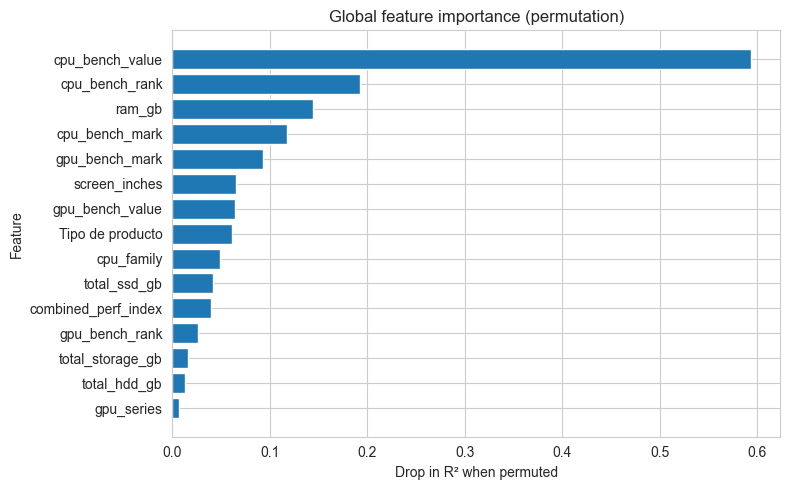

In [54]:
# Cell 1 – Global feature importance (permutation importance)
# Assumes: final_pipeline, X_valid, y_valid already exist.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Use the raw validation data to evaluate importance
X_valid_raw = X_valid.copy()
y_valid_raw = y_valid.copy()

perm_result = permutation_importance(
    final_pipeline,
    X_valid_raw,
    y_valid_raw,
    n_repeats=10,
    random_state=42,
    scoring="r2",
)

fi_global = (
    pd.DataFrame(
        {
            "feature": X_valid_raw.columns,
            "importance_mean": perm_result.importances_mean,
            "importance_std": perm_result.importances_std,
        }
    )
    .sort_values("importance_mean", ascending=False)
    .reset_index(drop=True)
)

display(fi_global.head(20))

# Plot top-k features
top_k = 15
plt.figure(figsize=(8, 5))
plt.barh(
    fi_global["feature"].head(top_k)[::-1],
    fi_global["importance_mean"].head(top_k)[::-1],
)
plt.xlabel("Drop in R² when permuted")
plt.ylabel("Feature")
plt.title("Global feature importance (permutation)")
plt.tight_layout()
plt.show()


,group,importance_mean
3,CPU value,0.593868
2,CPU performance,0.310023
8,Memory,0.147645
5,GPU performance,0.119604
12,Storage,0.072227
11,Screen,0.070537
7,GPU value,0.063876
10,Product type,0.061128
1,CPU family,0.048789
9,Other,0.039350


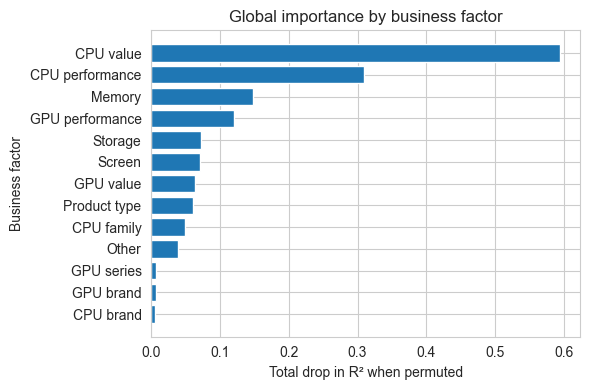

In [55]:
# Cell 2 – Grouped global importance by business factor
# Aggregates technical features into business-level groups.

FEATURE_GROUPS = {
    "cpu_bench_mark": "CPU performance",
    "cpu_bench_rank": "CPU performance",
    "cpu_bench_value": "CPU value",

    "cpu_family": "CPU family",
    "cpu_brand": "CPU brand",

    "gpu_bench_mark": "GPU performance",
    "gpu_bench_rank": "GPU performance",
    "gpu_bench_value": "GPU value",

    "gpu_series": "GPU series",
    "gpu_brand": "GPU brand",

    "ram_gb": "Memory",
    "is_high_ram": "Memory",

    "total_ssd_gb": "Storage",
    "total_hdd_gb": "Storage",
    "total_storage_gb": "Storage",
    "has_ssd": "Storage",

    "screen_inches": "Screen",
    "screen_refresh_hz": "Screen",
    "screen_width_px": "Screen",
    "screen_height_px": "Screen",
    "screen_pixel_density": "Screen",
    "screen_resolution_category": "Screen",

    "Tipo de producto": "Product type",
}

fi_global_grouped = (
    fi_global
    .assign(group=fi_global["feature"].map(FEATURE_GROUPS).fillna("Other"))
    .groupby("group", as_index=False)["importance_mean"]
    .sum()
    .sort_values("importance_mean", ascending=False)
)

display(fi_global_grouped)

plt.figure(figsize=(6, 4))
plt.barh(
    fi_global_grouped["group"][::-1],
    fi_global_grouped["importance_mean"][::-1],
)
plt.xlabel("Total drop in R² when permuted")
plt.ylabel("Business factor")
plt.title("Global importance by business factor")
plt.tight_layout()
plt.show()


In [56]:
# Cell 3 – SHAP explainer setup for local explanations
# Assumes: final_pipeline, X_train, numeric_features, categorical_features.

import shap

# Extract preprocessor + model from the pipeline
preprocess = final_pipeline.named_steps["preprocess"]
model = final_pipeline.named_steps["model"]

# Background sample for SHAP (keeps it fast)
background_size = min(1000, len(X_train))
X_background = X_train.sample(background_size, random_state=42)
X_background_transformed = preprocess.transform(X_background)

# Names of transformed features (after one-hot, scaling, etc.)
feature_names_transformed = preprocess.get_feature_names_out()

# TreeExplainer for the trained XGBRegressor (or other tree model)
explainer = shap.TreeExplainer(model, X_background_transformed)


In [57]:
# Cell 4 – Helper functions for local explanations (tables + text)
# Creates:
#   - explain_single_prediction: SHAP table for one product
#   - summarize_explanation: short natural-language explanation

import numpy as np

# Optional: nice labels for some transformed features
FRIENDLY_NAMES = {
    "num__cpu_bench_value": "CPU market value",
    "num__cpu_bench_mark": "CPU performance score",
    "num__cpu_bench_rank": "CPU performance rank",

    "num__gpu_bench_mark": "GPU performance score",
    "num__gpu_bench_value": "GPU market value",

    "num__ram_gb": "RAM (GB)",
    "num__total_storage_gb": "Total storage (GB)",
    "num__total_ssd_gb": "SSD capacity (GB)",
    "num__total_hdd_gb": "HDD capacity (GB)",

    "num__screen_inches": "Screen size (inches)",
    "num__screen_refresh_hz": "Screen refresh rate (Hz)",
}

def friendly_label(transformed_name: str) -> str:
    """Map transformed feature names to something readable for humans."""
    if transformed_name in FRIENDLY_NAMES:
        return FRIENDLY_NAMES[transformed_name]

    if transformed_name.startswith("cat__"):
        # cat__Tipo de producto_Gaming Laptop -> "Tipo de producto: Gaming Laptop"
        raw = transformed_name.replace("cat__", "")
        raw = raw.replace("_", " ")
        col, _, val = raw.partition(" ")
        return f"{col}: {val}"

    if transformed_name.startswith("num__"):
        return transformed_name.replace("num__", "")

    return transformed_name


def explain_single_prediction(row_df: pd.DataFrame, top_k: int = 8):
    """
    row_df: single-row DataFrame with the same columns as the training features.
    Returns:
        - predicted_price
        - base_price (model baseline)
        - contributions: DataFrame sorted by |SHAP value|
    """
    # 1) Predict price
    pred_price = float(final_pipeline.predict(row_df)[0])

    # 2) Transform row using the preprocessor
    X_row_transformed = preprocess.transform(row_df)

    # 3) Compute SHAP values
    shap_values = explainer(X_row_transformed)
    shap_vals_row = shap_values.values[0]

    # Expected (baseline) value of the model
    expected = explainer.expected_value
    if isinstance(expected, (list, np.ndarray)):
        base_price = float(np.array(expected).mean())
    else:
        base_price = float(expected)

    # 4) Build contributions DataFrame
    contrib_df = pd.DataFrame(
        {
            "feature_transformed": feature_names_transformed,
            "shap_value": shap_vals_row,
        }
    )
    contrib_df["abs_shap"] = contrib_df["shap_value"].abs()
    contrib_df = contrib_df.sort_values("abs_shap", ascending=False).head(top_k)

    # Direction of effect: raises or lowers price
    contrib_df["effect_direction"] = np.where(
        contrib_df["shap_value"] > 0, "raises", "lowers"
    )

    # Friendly labels for UI / report
    contrib_df["feature_friendly"] = contrib_df["feature_transformed"].apply(
        friendly_label
    )

    return {
        "predicted_price": pred_price,
        "base_price": base_price,
        "contributions": contrib_df.reset_index(drop=True),
    }


def summarize_explanation(explanation: dict, n: int = 3) -> str:
    """
    Build a short text summary from the top-n SHAP contributions.
    """
    df = explanation["contributions"].head(n)
    sentences = []
    for _, row in df.iterrows():
        delta = abs(row["shap_value"])
        sentences.append(
            f"{row['feature_friendly']} {row['effect_direction']} the price by about {delta:.0f} €."
        )
    return " ".join(sentences)


In [58]:
# Cell 5 – Example: explain one product from the validation set

# Pick any row from the validation set
example_idx = X_valid.index[0]
row_df_example = X_valid.loc[[example_idx]]

explanation_example = explain_single_prediction(row_df_example, top_k=8)

display(explanation_example["contributions"])

print(f"Predicted price: {explanation_example['predicted_price']:.2f} €")
print(f"Baseline (average) model price: {explanation_example['base_price']:.2f} €")
print("Short explanation:")
print(summarize_explanation(explanation_example))


,feature_transformed,shap_value,abs_shap,effect_direction,feature_friendly
0,num__cpu_bench_value,-586.372048,586.372048,lowers,CPU market value
1,num__gpu_bench_mark,256.011094,256.011094,raises,GPU performance score
2,num__ram_gb,197.816207,197.816207,raises,RAM (GB)
3,num__cpu_bench_rank,193.848849,193.848849,raises,CPU performance rank
4,num__cpu_bench_mark,134.065699,134.065699,raises,CPU performance score
5,num__gpu_bench_rank,123.352737,123.352737,raises,gpu_bench_rank
6,num__screen_inches,-101.800863,101.800863,lowers,Screen size (inches)
7,num__total_hdd_gb,-91.616206,91.616206,lowers,HDD capacity (GB)


Predicted price: 1467.12 €
Baseline (average) model price: 1478.37 €
Short explanation:
CPU market value lowers the price by about 586 €. GPU performance score raises the price by about 256 €. RAM (GB) raises the price by about 198 €.


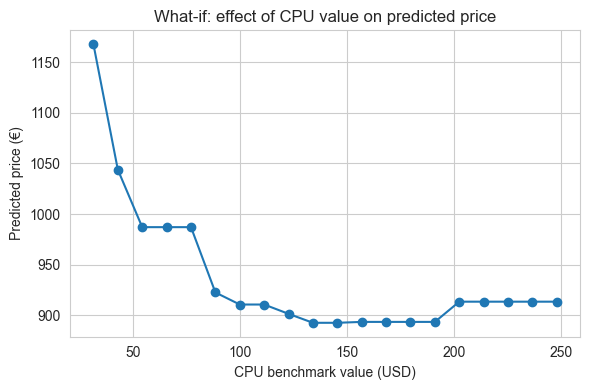

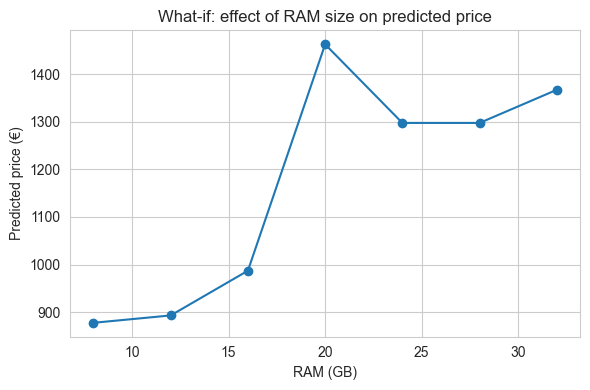

In [59]:
# Cell 6 – Simple "what-if" simulation for individual features
# Assumes: model_df, numeric_features, categorical_features, final_pipeline.

def make_base_profile(df, numeric_cols, categorical_cols):
    """
    Construct a typical configuration using medians (numeric) and modes (categorical).
    """
    base = {}
    for col in numeric_cols:
        base[col] = df[col].median()
    for col in categorical_cols:
        base[col] = df[col].mode()[0]
    return pd.DataFrame([base])

base_profile = make_base_profile(model_df, numeric_features, categorical_features)

def simulate_feature_effect(feature: str, values, base_row: pd.DataFrame = None):
    """
    Varies a single feature around a base configuration and records predictions.
    """
    if base_row is None:
        base_row = base_profile

    records = []
    for val in values:
        row = base_row.copy()
        row[feature] = val
        pred = float(final_pipeline.predict(row)[0])
        records.append({"feature_value": val, "predicted_price": pred})
    return pd.DataFrame(records)


# Example 1: what-if for CPU value
cpu_min = model_df["cpu_bench_value"].quantile(0.05)
cpu_max = model_df["cpu_bench_value"].quantile(0.95)
cpu_values = np.linspace(cpu_min, cpu_max, 20)

df_cpu_effect = simulate_feature_effect("cpu_bench_value", cpu_values)

plt.figure(figsize=(6, 4))
plt.plot(df_cpu_effect["feature_value"], df_cpu_effect["predicted_price"], marker="o")
plt.xlabel("CPU benchmark value (USD)")
plt.ylabel("Predicted price (€)")
plt.title("What-if: effect of CPU value on predicted price")
plt.tight_layout()
plt.show()


# Example 2: what-if for RAM (GB)
ram_min = model_df["ram_gb"].quantile(0.1)
ram_max = model_df["ram_gb"].quantile(0.9)
ram_values = np.arange(ram_min, ram_max + 1, 4)

df_ram_effect = simulate_feature_effect("ram_gb", ram_values)

plt.figure(figsize=(6, 4))
plt.plot(df_ram_effect["feature_value"], df_ram_effect["predicted_price"], marker="o")
plt.xlabel("RAM (GB)")
plt.ylabel("Predicted price (€)")
plt.title("What-if: effect of RAM size on predicted price")
plt.tight_layout()
plt.show()


In [60]:
# Cell 7 – Explanations for cheap, mid-range, and premium configurations
# Gives three representative examples that you can show in the report/slides.

def explain_by_price_segment(label: str, idx: int):
    row_df = model_df.loc[[idx], numeric_features + categorical_features]
    exp = explain_single_prediction(row_df, top_k=8)

    print(f"\n=== {label} configuration ===")
    print(f"Actual price:    {model_df.loc[idx, 'price_numeric_clean']:.2f} €")
    print(f"Predicted price: {exp['predicted_price']:.2f} €")
    display(exp["contributions"])
    print("Summary:", summarize_explanation(exp))

# Lowest-priced product, median, and highest-priced product
low_idx = model_df["price_numeric_clean"].idxmin()
mid_idx = model_df["price_numeric_clean"].sort_values().index[len(model_df) // 2]
high_idx = model_df["price_numeric_clean"].idxmax()

explain_by_price_segment("Cheap", low_idx)
explain_by_price_segment("Mid-range", mid_idx)
explain_by_price_segment("Premium", high_idx)



=== Cheap configuration ===
Actual price:    88.73 €
Predicted price: 439.74 €


,feature_transformed,shap_value,abs_shap,effect_direction,feature_friendly
0,num__cpu_bench_value,994.503496,994.503496,raises,CPU market value
1,num__cpu_bench_rank,-660.702640,660.702640,lowers,CPU performance rank
2,num__cpu_bench_mark,-330.067339,330.067339,lowers,CPU performance score
3,num__gpu_bench_mark,-163.752849,163.752849,lowers,GPU performance score
4,num__screen_inches,-135.236490,135.236490,lowers,Screen size (inches)
5,cat__Tipo de producto_PC gaming,-85.777546,85.777546,lowers,Tipo: de producto PC gaming
6,num__ram_gb,-84.134155,84.134155,lowers,RAM (GB)
7,num__gpu_bench_value,-79.677673,79.677673,lowers,GPU market value


Summary: CPU market value raises the price by about 995 €. CPU performance rank lowers the price by about 661 €. CPU performance score lowers the price by about 330 €.

=== Mid-range configuration ===
Actual price:    1184.95 €
Predicted price: 1388.35 €


,feature_transformed,shap_value,abs_shap,effect_direction,feature_friendly
0,num__gpu_bench_mark,240.565859,240.565859,raises,GPU performance score
1,num__cpu_bench_value,-176.390797,176.390797,lowers,CPU market value
2,num__screen_inches,-135.235043,135.235043,lowers,Screen size (inches)
3,num__gpu_bench_rank,130.693747,130.693747,raises,gpu_bench_rank
4,num__ram_gb,-93.645286,93.645286,lowers,RAM (GB)
5,num__gpu_bench_value,-71.134057,71.134057,lowers,GPU market value
6,num__total_hdd_gb,-65.625056,65.625056,lowers,HDD capacity (GB)
7,num__cpu_bench_rank,-51.498676,51.498676,lowers,CPU performance rank


Summary: GPU performance score raises the price by about 241 €. CPU market value lowers the price by about 176 €. Screen size (inches) lowers the price by about 135 €.

=== Premium configuration ===
Actual price:    20579.90 €
Predicted price: 20519.69 €


,feature_transformed,shap_value,abs_shap,effect_direction,feature_friendly
0,num__cpu_bench_rank,4992.321156,4992.321156,raises,CPU performance rank
1,num__ram_gb,3847.815302,3847.815302,raises,RAM (GB)
2,num__cpu_bench_value,3783.363701,3783.363701,raises,CPU market value
3,num__cpu_bench_mark,3521.716313,3521.716313,raises,CPU performance score
4,num__combined_perf_index,638.333853,638.333853,raises,combined_perf_index
5,cat__Tipo de producto_Workstation,633.790450,633.790450,raises,Tipo: de producto Workstation
6,num__gpu_bench_mark,625.752337,625.752337,raises,GPU performance score
7,num__gpu_bench_value,420.015428,420.015428,raises,GPU market value


Summary: CPU performance rank raises the price by about 4992 €. RAM (GB) raises the price by about 3848 €. CPU market value raises the price by about 3783 €.


In [61]:
# === Explainability "API" for the rest of the project ======================

import json
from datetime import datetime

# 1) Main entry point: predict + explain in one call
def summarize_explanation(explanation: dict, n: int = 3) -> str:
    """
    Build a short text summary from the top-n SHAP contributions.

    Uses the existing 'contributions' DataFrame from explain_single_prediction,
    which is expected to have columns:
      - feature_transformed
      - shap_value
      - abs_shap
      - effect  (e.g. '↑ increases price' / '↓ decreases price')
    """
    df = explanation["contributions"].head(n)
    parts = []
    for _, row in df.iterrows():
        delta = abs(row["shap_value"])
        parts.append(
            f"{row['feature_transformed']} {row['effect']} by around {delta:.0f} €."
        )
    return " ".join(parts)


def predict_and_explain(row_df, top_k: int = 8) -> dict:
    """
    Main function for the web app / NLP agent.

    Parameters
    ----------
    row_df : pd.DataFrame (one row)
        Must contain the same columns as we used for training:
        numeric_features + categorical_features.
    top_k : int
        Number of feature contributions to keep.

    Returns
    -------
    dict with keys:
        - 'predicted_price' : float
        - 'base_value'      : float  (model baseline)
        - 'contributions'   : pd.DataFrame (top-k features)
        - 'summary'         : short natural-language explanation
    """
    # Ensure correct column order
    expected_cols = numeric_features + categorical_features
    row_df = row_df[expected_cols]

    explanation = explain_single_prediction(row_df, top_k=top_k)
    explanation["summary"] = summarize_explanation(explanation)
    return explanation


# 2) Save global explanation artifacts for the UI
#    (run this once after computing fi_global)

fi_global.to_csv("fi_global.csv", index=False)
print("Saved fi_global.csv (feature-level importance).")

# Optional: if you built fi_global_grouped, save it too
try:
    fi_global_grouped.to_csv("fi_global_grouped.csv", index=False)
    print("Saved fi_global_grouped.csv (business-factor importance).")
except NameError:
    print("fi_global_grouped not defined – skip grouped importance export.")


# 3) Tiny logging helper for feedback (used later by UI / NLP)
LOG_PATH = "prediction_log.jsonl"

def log_interaction(input_row_df, result_dict, user_feedback=None):
    """
    Append a JSON line with:
      - raw input features
      - model prediction
      - explanation summary
      - optional user feedback

    This can be called from the Streamlit app after each prediction.
    """
    record = {
        "timestamp": datetime.utcnow().isoformat(),
        "input": input_row_df.to_dict(orient="records")[0],
        "predicted_price": float(result_dict["predicted_price"]),
        "base_value": float(result_dict.get("base_value", 0.0)),
        "summary": result_dict.get("summary"),
        "feedback": user_feedback,  # e.g. 'too expensive', rating, etc.
    }
    with open(LOG_PATH, "a", encoding="utf-8") as f:
        f.write(json.dumps(record, ensure_ascii=False) + "\n")


Saved fi_global.csv (feature-level importance).
Saved fi_global_grouped.csv (business-factor importance).


In [62]:
# === SHAP background sample for the Streamlit app ===

ALL_FEATURES = numeric_features + categorical_features

background_size = min(1000, len(X_train))
X_background = X_train[ALL_FEATURES].sample(background_size, random_state=42)

joblib.dump(X_background, ARTIFACTS_DIR / "shap_background.joblib")

print("saved SHAP background for the web app:")
print("   - shap_background.joblib")


saved SHAP background for the web app:
   - shap_background.joblib


## Explainability Module – Summary and Integration Guide

The explainability module builds on the trained price prediction pipeline and provides both global and local explanations of the model’s behaviour. At the global level, we compute permutation-based feature importances and store them in `fi_global.csv` (and optionally `fi_global_grouped.csv`, where features are aggregated into business factors such as CPU, GPU, Memory, Storage, Screen, and Product type). These files can be loaded directly by the web application to display bar charts that show which components the model relies on most when estimating price.

At the local level, the module exposes a function `predict_and_explain(row_df)` that takes a **single-row DataFrame** with the same columns used for training (`numeric_features + categorical_features`). Internally, this function calls the trained pipeline to obtain the predicted price and uses SHAP values to produce a ranked list of the top contributing features for that specific configuration. It returns a dictionary with the predicted price, the model’s baseline price, a table of feature contributions, and a short natural-language summary that explains which components raise or lower the estimated price and by approximately how much.

For the **Application UI team (Block 2)**, the typical workflow is: (1) collect user inputs from sliders and dropdowns, (2) build a one-row DataFrame `user_row_df` with the expected feature names, (3) call `result = predict_and_explain(user_row_df)`, and (4) display `result["predicted_price"]` as the main output, `result["summary"]` as the textual explanation, and `result["contributions"]` as a table or bar chart of the top drivers. On a separate “Model Insights” page, the UI can load `fi_global.csv` (and `fi_global_grouped.csv` if available) to visualize global and business-level feature importances without recomputing them in the app.

For the **NLP Agent and Documentation team (Block 3)**, the idea is to translate free-text user descriptions into the structured features expected by the model (e.g., mapping “mid-range gaming laptop with 16GB RAM and SSD” into CPU/GPU family, RAM amount, storage size, screen size, and product type), then build `user_row_df` and again call `predict_and_explain`. The agent can reuse the returned price and summary to generate a natural-language answer, while the documentation can describe the model’s inputs, the role of the explainability module, and its limitations. Additionally, the helper `log_interaction(input_row_df, result_dict, user_feedback)` appends JSON records to `prediction_log.jsonl`, allowing the UI or NLP components to record user interactions and feedback for later monitoring and analysis.
